In [145]:
# Add Matplotlib inline magic command
%matplotlib inline
# Add the dependency libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.lines as mlines
import os
import numpy as np

In [146]:
def plot_rhodes(MgO_Num='', Fo='') :
    
    # Define the 3 Kd values
    Kd1 = 0.315
    Kd2 = 0.345
    Kd3 = 0.375

    Mg_Fe_Ol = np.arange(1,1000,0.1)
    Mg_Num_Ol = 100*(Mg_Fe_Ol/(Mg_Fe_Ol+1))

    # Calculate equilibrium lines
    Fo_liq_1  = (Mg_Fe_Ol*Kd1)
    Mg_NUM_liq_1 = 100*(Fo_liq_1/(Fo_liq_1+1))

    Fo_liq_2  = (Mg_Fe_Ol*Kd2)
    Mg_NUM_liq_2 = 100*(Fo_liq_2/(Fo_liq_2+1))

    Fo_liq_3  = (Mg_Fe_Ol*Kd3)
    Mg_NUM_liq_3 = 100*(Fo_liq_3/(Fo_liq_3+1))

    fig, ax = plt.subplots()

    #Kd = 0.315
    ax.set_ylabel("Forsterite", fontsize=12)
    ax.set_xlabel("Mg #", fontsize=12)
    ax.plot(Mg_NUM_liq_1, Mg_Num_Ol, "green", label='$K_{d} = 0.315$', linestyle='--')

    #Kd = 0.345
    ax.plot(Mg_NUM_liq_2, Mg_Num_Ol, "green", label='$K_{d} = 0.345$')

    #Kd = 0.375
    ax.plot(Mg_NUM_liq_3, Mg_Num_Ol, "green", label='$K_{d} = 0.375$', linestyle='--')

    #Adjust axis properties

    ax.set_xlim(52.5, 77)
    ax.set_ylim(76, 92)
    ax.set_title('Rhodes Diagram')


    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))

    ax.yaxis.set_major_locator(MultipleLocator(5))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_minor_locator(MultipleLocator(1))

    #Legend properties
    legend = ax.legend(loc='upper left', shadow=True, fontsize='large')
    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('lightgrey')

    #Grid lines
    ax.grid(True, which='major', color='k', linestyle='-', linewidth=1)
    ax.grid(True, which='minor', linestyle = '--')
    fig.set_size_inches(7,5)
    fig.set_dpi(100)

    plt.show()

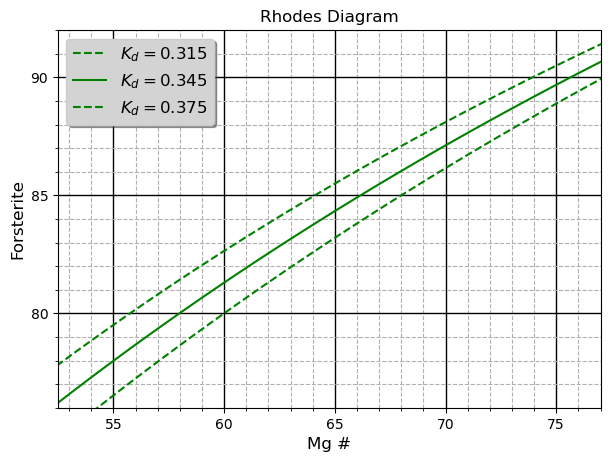

In [147]:
plot_rhodes()

## Data Preprocessing
### Calculate MgO #

In [148]:
#import data
data = os.path.join("..","DATA", "new_data_csv.csv")
df = pd.read_csv(data)

In [149]:
df

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,TOTAL,SiO2_ol,FeO_ol,MgO_ol,CaO_ol,NiO_ol,MnO_ol,TOTAL_ol,Fo
0,EXI504L2 18-1,45.09,3.59,16.62,14.33,0.13,4.49,10.84,3.11,0.68,1.10,99.97,38.89,17.50,42.34,0.22,0.29,0.22,99.47,81.18
1,EXI504L2 15-3,48.71,2.34,12.70,12.62,0.16,9.92,10.79,2.20,0.52,0.26,100.20,40.24,9.11,49.35,0.25,0.42,0.12,99.52,90.62
2,EX1504L2-D7-1,45.35,2.84,13.68,12.81,0.17,7.98,12.95,2.28,0.47,1.44,99.97,40.14,12.40,46.63,0.25,0.37,0.16,99.97,87.02
3,EXI504L2 11-2,43.57,2.23,8.64,15.70,0.20,18.92,8.14,1.23,0.54,0.26,99.44,39.87,13.27,45.89,0.32,0.31,0.19,99.86,86.04
4,EX1504L2-D2-4,44.02,3.05,12.20,13.90,0.18,10.03,12.64,2.11,0.86,0.91,99.89,40.35,10.17,48.30,0.30,0.35,0.15,99.64,89.44


In [150]:
df['FeO'] = 0.899*df['Fe2O3']

In [151]:
df['MgO_Num'] = 100*((df['FeO']/40.3)/((df['FeO']/40.3)+(df['MgO']/71.85)))

In [152]:
df

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,...,SiO2_ol,FeO_ol,MgO_ol,CaO_ol,NiO_ol,MnO_ol,TOTAL_ol,Fo,FeO,MgO_Num
0,EXI504L2 18-1,45.09,3.59,16.62,14.33,0.13,4.49,10.84,3.11,0.68,...,38.89,17.50,42.34,0.22,0.29,0.22,99.47,81.18,12.88267,83.647892
1,EXI504L2 15-3,48.71,2.34,12.70,12.62,0.16,9.92,10.79,2.20,0.52,...,40.24,9.11,49.35,0.25,0.42,0.12,99.52,90.62,11.34538,67.095043
2,EX1504L2-D7-1,45.35,2.84,13.68,12.81,0.17,7.98,12.95,2.28,0.47,...,40.14,12.40,46.63,0.25,0.37,0.16,99.97,87.02,11.51619,72.011752
3,EXI504L2 11-2,43.57,2.23,8.64,15.70,0.20,18.92,8.14,1.23,0.54,...,39.87,13.27,45.89,0.32,0.31,0.19,99.86,86.04,14.11430,57.082013
4,EX1504L2-D2-4,44.02,3.05,12.20,13.90,0.18,10.03,12.64,2.11,0.86,...,40.35,10.17,48.30,0.30,0.35,0.15,99.64,89.44,12.49610,68.956044


In [153]:
#text[i], (x[i], y[i]
text = df['sample'].tolist()
x = df.MgO_Num.tolist()
y = df.Fo.tolist()
print(text, x ,y)

['EXI504L2 18-1 ', 'EXI504L2 15-3 ', 'EX1504L2-D7-1', 'EXI504L2 11-2 ', 'EX1504L2-D2-4'] [83.64789242358277, 67.09504263700164, 72.01175166491835, 57.08201312160389, 68.95604431578839] [81.18, 90.62, 87.02, 86.04, 89.44]


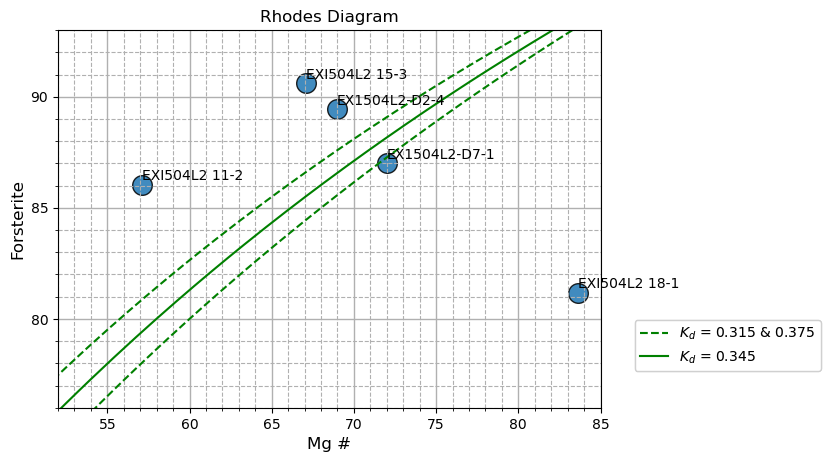

In [154]:
# Define the 3 Kd values
Kd1 = 0.315
Kd2 = 0.345
Kd3 = 0.375

Mg_Fe_Ol = np.arange(1,1000,0.1)
Mg_Num_Ol = 100*(Mg_Fe_Ol/(Mg_Fe_Ol+1))

# Calculate equilibrium lines
Fo_liq_1  = (Mg_Fe_Ol*Kd1)
Mg_NUM_liq_1 = 100*(Fo_liq_1/(Fo_liq_1+1))

Fo_liq_2  = (Mg_Fe_Ol*Kd2)
Mg_NUM_liq_2 = 100*(Fo_liq_2/(Fo_liq_2+1))

Fo_liq_3  = (Mg_Fe_Ol*Kd3)
Mg_NUM_liq_3 = 100*(Fo_liq_3/(Fo_liq_3+1))

fig, ax = plt.subplots()

#Set axis labels
ax.set_ylabel("Forsterite", fontsize=12)
ax.set_xlabel("Mg #", fontsize=12)

#Kd = 0.315
kd1 = ax.plot(Mg_NUM_liq_1, Mg_Num_Ol, "green", label='$K_{d} = 0.315$', linestyle='--')

#Kd = 0.345
kd2 = ax.plot(Mg_NUM_liq_2, Mg_Num_Ol, "green", label='$K_{d} = 0.345$')

#Kd = 0.375
kd3 = ax.plot(Mg_NUM_liq_3, Mg_Num_Ol, "green", label='$K_{d} = 0.375$', linestyle='--')

#Plot data with colors representing the distance from Kilauea
data = ax.scatter(
    df.MgO_Num, 
    df.Fo, 
    s=200, 
    alpha=0.85, 
    edgecolors='k' 
    
)

#Adjust axis properties

ax.set_xlim(52, 85)
ax.set_ylim(76, 93)
ax.set_title('Rhodes Diagram')


ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))

#Grid lines
ax.grid(True, which='major', linestyle='-', linewidth=1)
ax.grid(True, which='minor', linestyle = '--')

#Legend properties
# legend = ax.legend(loc='upper left', shadow=True, fontsize='large')
# # Put a nicer background color on the legend.
# legend.get_frame().set_facecolor('lightgrey')

kd_1_3_line = mlines.Line2D([], [], color='green', label='$K_{d}$ = 0.315 & 0.375', linestyle='--')
kd_2_line = mlines.Line2D([], [], color='green', label='$K_{d}$ = 0.345', linestyle='-')

legend = ax.legend(handles=[kd_1_3_line, kd_2_line])
first_legend = ax.legend(
    handles=[kd_1_3_line, kd_2_line], 
    facecolor = 'white', 
    loc='upper left',  
    bbox_to_anchor=(1.05, 0.25) )

plt.gca().add_artist(first_legend)

# Loop for annotation of all points
for i in range(len(x)):
    plt.annotate(text[i], (x[i], y[i] + 0.2))

#handles = [mlines.Line2D([0], [0], marker='o', color='w', 
                  #markerfacecolor=v, label=k, markersize=8, markeredgecolor='k') for k, v in color_dict.items()]

#ax.legend(title='Seamounts', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

fig.set_size_inches(7,5)
fig.set_dpi(100)

plt.show()

In [155]:
df

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,...,SiO2_ol,FeO_ol,MgO_ol,CaO_ol,NiO_ol,MnO_ol,TOTAL_ol,Fo,FeO,MgO_Num
0,EXI504L2 18-1,45.09,3.59,16.62,14.33,0.13,4.49,10.84,3.11,0.68,...,38.89,17.50,42.34,0.22,0.29,0.22,99.47,81.18,12.88267,83.647892
1,EXI504L2 15-3,48.71,2.34,12.70,12.62,0.16,9.92,10.79,2.20,0.52,...,40.24,9.11,49.35,0.25,0.42,0.12,99.52,90.62,11.34538,67.095043
2,EX1504L2-D7-1,45.35,2.84,13.68,12.81,0.17,7.98,12.95,2.28,0.47,...,40.14,12.40,46.63,0.25,0.37,0.16,99.97,87.02,11.51619,72.011752
3,EXI504L2 11-2,43.57,2.23,8.64,15.70,0.20,18.92,8.14,1.23,0.54,...,39.87,13.27,45.89,0.32,0.31,0.19,99.86,86.04,14.11430,57.082013
4,EX1504L2-D2-4,44.02,3.05,12.20,13.90,0.18,10.03,12.64,2.11,0.86,...,40.35,10.17,48.30,0.30,0.35,0.15,99.64,89.44,12.49610,68.956044


#### So we need to use olivine addition on 3 samples (EX1504L2-15-3, D2-4 and 11-2), and olivine subtraction on the remaining samples (EX1504L2-D7-1, and 18-1)

##### MATLAB Script for olivine fractionation (removal)
```
%% Jonathan Tree

%This script conducts simple olivine removal by finding the median
%forsterite measured within a sample and subtracting small steps from the
%whole rock composition to obtain the parental magma in equilibrium with
%the highest fosterite measured in that sample
clear all; clc;

sample_name='NIH-F-5A';

workbookFile = 'Olivine_Data/NIH-F-5A';
sheetName='sheet1';
startRow=2;
endRow=27;

[Sample_Number,SiO2_Ol,FeO_Ol,NiO_Ol,MnO_Ol,MgO_Ol,CaO_Ol,Total_Ol,Fo_Ol] = ...
    import_Ol(workbookFile,sheetName,startRow,endRow);

WR = [44.58	1.60 7.86 (0.1*14.33) (0.9*14.33) 0.18 24.02 5.71 0.99 0.10 0.32 99.69];

%%
median_Fo = median(Fo_Ol);
mean_Fo   = mean(Fo_Ol);
mode_Fo   = mode(Fo_Ol);
n         = length(Fo_Ol);


for i= 1:n
    tmp(i) = abs(median_Fo-Fo_Ol(i));
    tmp=tmp';
    [x, idx] = min(tmp); %index of closest value
    closest_Fo = Fo_Ol(idx); %closest Fo
end

display (['The Olivine Forsterite being taken out is ' num2str(closest_Fo)])

Model_OL_SiO2 = SiO2_Ol(idx);
Model_OL_FeO  = FeO_Ol(idx);
Model_OL_NiO  = NiO_Ol(idx);
Model_OL_MnO  = MnO_Ol(idx);
Model_OL_MgO  = MgO_Ol(idx);
Model_OL_CaO  = CaO_Ol(idx);

N_WR        = length(WR);
Model_Magma(1, 1:N_WR) = WR;   

OL_Model_Array = [Model_OL_SiO2 0 0 0 Model_OL_FeO Model_OL_MnO Model_OL_MgO ...
                    Model_OL_CaO 0 0 0 0];

%%

MAX_Fo    = max(Fo_Ol);
display(['The Max Fo to equilibrate with is ' num2str(MAX_Fo)])


Kd1 = 0.315; 


Mg_Fe_Ol   = (1:0.1:1000)';
Mg_NUM_ol  = 100*(Mg_Fe_Ol./(Mg_Fe_Ol+1))';

Mg_Fe_liq_1  = (Mg_Fe_Ol*Kd1)';
Mg_NUM_liq_1 = 100*(Mg_Fe_liq_1./(Mg_Fe_liq_1+1))';
    

for o= 1:length(Mg_NUM_ol)
    Fo_tmp(o) = abs(MAX_Fo-Mg_NUM_ol(o));
    [Fo, idx_Max_Fo] = min(Fo_tmp); %index of closest value
    Target_MG_Num = Mg_NUM_liq_1(idx_Max_Fo); %closest Fo
end

%%
LIMIT = 0.01;
flag = 0;
d_Mg(2) = 5;
j = 2;

while (flag==0) 
    Model_Magma(j, 1:N_WR) = Model_Magma(j-1, 1:N_WR) - 0.0001*OL_Model_Array;
    TOTAL(j) = sum(Model_Magma(j, 1:N_WR-1));
    Model_Magma(j, N_WR) = TOTAL(j);
    Model_Magma(j, 1:N_WR) = 100*(Model_Magma(j, 1:N_WR)./TOTAL(j));
    Model_Magma(j, N_WR) = sum(Model_Magma(j, 1:N_WR-1));
    
        Magma_Mg(j) = Model_Magma(j, 7)/40.31;
        Magma_Fe(j) = Model_Magma(j, 5)/71.85;

        Magma_Mg_Num(j) = (Magma_Mg(j)./(Magma_Mg(j)+Magma_Fe(j)))*100;
        
            
        d_Mg(j) = abs(Magma_Mg_Num(j)-Target_MG_Num);
        
        if d_Mg(j) < LIMIT
            flag = 1;
        elseif d_Mg(j) > LIMIT
            j=j+1;
        end 
      
end  
[Kd_315] = Model_Magma(j, 1:N_WR);
Kd_315 = Kd_315';

%% Find the parental magmas in equilibrium with Kd = 0.345 and 0.375
Kd2 = 0.345;
Mg_Fe_liq_2  = (Mg_Fe_Ol*Kd2)';
Mg_NUM_liq_2 = 100*(Mg_Fe_liq_2./(Mg_Fe_liq_2+1))';

for oo= 1:length(Mg_NUM_ol)
    Fo_tmp(oo) = abs(MAX_Fo-Mg_NUM_ol(oo));
    [Fo, idx_Max_Fo] = min(Fo_tmp); %index of closest value
    Target_MG_Num2 = Mg_NUM_liq_2(idx_Max_Fo); %closest Fo
end

for k= 1:length(Magma_Mg_Num)
    Mg_Num2_tmp(k) = abs(Target_MG_Num2-Magma_Mg_Num(k));
    [Mg_num2, idx_Mg_num2] = min(Mg_Num2_tmp); %index of closest value
    [Kd_345] = Model_Magma(idx_Mg_num2, 1:N_WR); %closest Fo
    Kd_345 = Kd_345';
end

Kd3 = 0.375;
Mg_Fe_liq_3  = (Mg_Fe_Ol*Kd3)';
Mg_NUM_liq_3 = 100*(Mg_Fe_liq_3./(Mg_Fe_liq_3+1))';

for ooo= 1:length(Mg_NUM_ol)
    Fo_tmp(ooo) = abs(MAX_Fo-Mg_NUM_ol(ooo));
    [Fo, idx_Max_Fo] = min(Fo_tmp); %index of closest value
    Target_MG_Num3 = Mg_NUM_liq_3(idx_Max_Fo); %closest Fo
end

for kk= 1:length(Magma_Mg_Num)
    Mg_Num3_tmp(kk) = abs(Target_MG_Num3-Magma_Mg_Num(kk));
    [Mg_num3, idx_Mg_num3] = min(Mg_Num3_tmp); %index of closest value
    [Kd_375] = Model_Magma(idx_Mg_num3, 1:N_WR); %closest Fo
    Kd_375 = Kd_375';
end


%% Display the Results

display (['The target Mg # for equilibrium with Kd=0.315 is ' num2str(Target_MG_Num)]);
display (['The final magma Mg # for Kd=0.315 is ' num2str(Magma_Mg_Num(j))]);

display (['The target Mg # for equilibrium with Kd=0.345 is ' num2str(Target_MG_Num2)]);
display (['The final magma Mg # for Kd=0.345 is ' num2str(Magma_Mg_Num(idx_Mg_num2))]);


display (['The target Mg # for equilibrium with Kd=0.375 is ' num2str(Target_MG_Num3)]);
display (['The final magma Mg # for Kd=0.375 is ' num2str(Magma_Mg_Num(idx_Mg_num3))]);


Oxides={'SiO2'; 'TiO2'; 'Al2O3'; 'Fe2O3'; 'FeO'; 'MnO'; 'MgO'; 'CaO'; 'Na2O'; 'K2O'; 'P2O5'; 'Total'};
Parental_Magamas=table(Kd_315, Kd_345, Kd_375,  'RowNames', Oxides)

writetable (Parental_Magamas, 'Ol_Removal_PM.xlsx', 'WriteRowNames', true, 'Sheet', sample_name);
```

In [156]:
# Get olivine data to be able to calculate the median olivine composition

ol_data = os.path.join("..", "DATA", "ol_data.csv")
ol_df = pd.read_csv(ol_data)

In [157]:
ol_df

,SAMPLE,NUMBER,SiO2,FeO,MgO,CaO,NiO,MnO,TOTAL,Fo
0,D18-1-_001,4.0,38.225500,21.314700,39.615800,0.234812,0.177097,0.262172,99.861400,76.815000
1,D18-1-_001,4.0,38.241300,21.233100,39.669500,0.232845,0.187069,0.262046,99.828400,76.907300
2,D18-1-_001,4.0,38.341700,21.218300,39.649000,0.231325,0.178396,0.261592,99.880300,76.910500
3,NaN,NaN,38.269500,21.255367,39.644767,0.232994,0.180854,0.261937,99.856700,76.877600
4,D18-1-_002,5.0,38.140500,21.158300,39.420000,0.261276,0.162664,0.266945,99.423600,76.857900
...,...,...,...,...,...,...,...,...,...,...
221,NaN,NaN,40.345933,11.274700,47.327067,0.318909,0.316384,0.164569,99.754633,88.211233
222,D2-4_010,63.0,39.676700,14.402500,45.052600,0.303962,0.292398,0.199342,99.952200,84.793400
223,D2-4_010,63.0,39.789800,14.263700,44.938100,0.305096,0.294804,0.197279,99.802200,84.885300
224,D2-4_010,63.0,39.809500,14.262600,44.772500,0.301625,0.306307,0.196228,99.655600,84.838800


In [158]:
ol_df.isna().sum()

SAMPLE    55
NUMBER    60
SiO2       8
FeO        8
MgO        8
CaO        8
NiO        8
MnO        8
TOTAL      8
Fo         8
dtype: int64

In [159]:
ol_df2 = ol_df.dropna(axis=0, thresh=None, subset='SAMPLE', inplace=False)

In [160]:
ol_df2

,SAMPLE,NUMBER,SiO2,FeO,MgO,CaO,NiO,MnO,TOTAL,Fo
0,D18-1-_001,4.0,38.2255,21.3147,39.6158,0.234812,0.177097,0.262172,99.8614,76.8150
1,D18-1-_001,4.0,38.2413,21.2331,39.6695,0.232845,0.187069,0.262046,99.8284,76.9073
2,D18-1-_001,4.0,38.3417,21.2183,39.6490,0.231325,0.178396,0.261592,99.8803,76.9105
4,D18-1-_002,5.0,38.1405,21.1583,39.4200,0.261276,0.162664,0.266945,99.4236,76.8579
5,D18-1-_002,5.0,37.9687,21.3426,39.4751,0.262853,0.159011,0.268533,99.4767,76.7282
...,...,...,...,...,...,...,...,...,...,...
219,D2-4_009,62.0,40.3568,11.3351,47.3802,0.319497,0.315664,0.164143,99.8915,88.1673
220,D2-4_009,62.0,40.4426,11.3049,47.2102,0.318462,0.319299,0.165473,99.7609,88.1576
222,D2-4_010,63.0,39.6767,14.4025,45.0526,0.303962,0.292398,0.199342,99.9522,84.7934
223,D2-4_010,63.0,39.7898,14.2637,44.9381,0.305096,0.294804,0.197279,99.8022,84.8853


In [161]:
ol_df2.isna().sum()

SAMPLE    0
NUMBER    5
SiO2      1
FeO       1
MgO       1
CaO       1
NiO       1
MnO       1
TOTAL     1
Fo        1
dtype: int64

In [162]:
D18_1 = ol_df2[ol_df2['SAMPLE'].str.contains("D18-1")]

In [163]:
import seaborn as sns

In [164]:
# plt.figure(figsize=(30,30))
# sns.pairplot(D18_1)

In [165]:
D18_1.to_csv('D18_1_ol.csv', index=False)

### Aquick view of the measurement distributions for olivine compositions show non-normal distributions and the mean composition will not be an acurrate measurement for the olivine compositon used in fractionation modelling. The median will be used instead to approximate the central tendacy of the distiribution of olivines in the magma.

In [166]:
D18_1.describe()

,NUMBER,SiO2,FeO,MgO,CaO,NiO,MnO,TOTAL,Fo
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,9.212121,38.244216,20.347431,39.955454,0.247776,0.202803,0.251485,99.345177,77.740422
std,3.506758,0.832617,1.628840,1.873035,0.025326,0.049247,0.023272,1.136116,2.217851
min,4.000000,34.574300,17.468800,32.603100,0.210961,0.141345,0.213310,93.855700,70.426600
25%,6.000000,38.146100,19.256200,39.251200,0.230518,0.162664,0.229275,99.402900,76.665900
50%,9.000000,38.335400,20.702500,39.669500,0.250763,0.187069,0.262046,99.581700,77.140700
75%,12.000000,38.685400,21.342600,41.228500,0.262660,0.232264,0.270799,99.861400,79.238400
max,15.000000,39.017800,24.404700,42.685400,0.330892,0.301771,0.290808,100.174000,81.219900


In [167]:
D18_1.head()

,SAMPLE,NUMBER,SiO2,FeO,MgO,CaO,NiO,MnO,TOTAL,Fo
0,D18-1-_001,4.0,38.2255,21.3147,39.6158,0.234812,0.177097,0.262172,99.8614,76.8150
1,D18-1-_001,4.0,38.2413,21.2331,39.6695,0.232845,0.187069,0.262046,99.8284,76.9073
2,D18-1-_001,4.0,38.3417,21.2183,39.6490,0.231325,0.178396,0.261592,99.8803,76.9105
4,D18-1-_002,5.0,38.1405,21.1583,39.4200,0.261276,0.162664,0.266945,99.4236,76.8579
5,D18-1-_002,5.0,37.9687,21.3426,39.4751,0.262853,0.159011,0.268533,99.4767,76.7282


In [168]:
D18_1_med = D18_1.median(axis=0)

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\1663245927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  D18_1_med = D18_1.median(axis=0)


In [169]:
D18_1_med

NUMBER     9.000000
SiO2      38.335400
FeO       20.702500
MgO       39.669500
CaO        0.250763
NiO        0.187069
MnO        0.262046
TOTAL     99.581700
Fo        77.140700
dtype: float64

In [170]:
D18_1_Avg = D18_1.describe(include='all').loc['mean']
D18_1_Avg

SAMPLE          NaN
NUMBER     9.212121
SiO2      38.244216
FeO       20.347431
MgO       39.955454
CaO        0.247776
NiO        0.202803
MnO        0.251485
TOTAL     99.345177
Fo        77.740422
Name: mean, dtype: object

In [171]:
df.columns

Index(['sample', 'SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'MnO', 'MgO', 'CaO', 'Na2O',
       'K2O', 'P2O5', 'TOTAL', 'SiO2_ol', 'FeO_ol', 'MgO_ol', 'CaO_ol',
       'NiO_ol', 'MnO_ol', 'TOTAL_ol', 'Fo', 'FeO', 'MgO_Num'],
      dtype='object')

In [172]:
df_WR = df[['sample', 'SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'MnO', 'MgO', 'CaO', 'Na2O',
       'K2O', 'P2O5', 'TOTAL']]

In [173]:
df_WR

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,TOTAL
0,EXI504L2 18-1,45.09,3.59,16.62,14.33,0.13,4.49,10.84,3.11,0.68,1.10,99.97
1,EXI504L2 15-3,48.71,2.34,12.70,12.62,0.16,9.92,10.79,2.20,0.52,0.26,100.20
2,EX1504L2-D7-1,45.35,2.84,13.68,12.81,0.17,7.98,12.95,2.28,0.47,1.44,99.97
3,EXI504L2 11-2,43.57,2.23,8.64,15.70,0.20,18.92,8.14,1.23,0.54,0.26,99.44
4,EX1504L2-D2-4,44.02,3.05,12.20,13.90,0.18,10.03,12.64,2.11,0.86,0.91,99.89


In [174]:
D18_WR = df_WR.iloc[0]

In [175]:
D18_WR

sample    EXI504L2 18-1 
SiO2               45.09
TiO2                3.59
Al2O3              16.62
Fe2O3              14.33
MnO                 0.13
MgO                 4.49
CaO                10.84
Na2O                3.11
K2O                 0.68
P2O5                 1.1
TOTAL              99.97
Name: 0, dtype: object

In [176]:
D18_WR['Fe2O3']

14.33

## Define the magma composition and adjust iron to FeO and Fe<sub>2</sub>O<sub>3</sub>

In [177]:
D18_WR

sample    EXI504L2 18-1 
SiO2               45.09
TiO2                3.59
Al2O3              16.62
Fe2O3              14.33
MnO                 0.13
MgO                 4.49
CaO                10.84
Na2O                3.11
K2O                 0.68
P2O5                 1.1
TOTAL              99.97
Name: 0, dtype: object

In [178]:
magma = D18_WR
magma['FeO'] = D18_WR['Fe2O3']*0.9
magma['Fe2O3'] = D18_WR['Fe2O3']*0.1

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\1198151489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  magma['FeO'] = D18_WR['Fe2O3']*0.9
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\1198151489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  magma['FeO'] = D18_WR['Fe2O3']*0.9
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\1198151489.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  magma['Fe2O3'] = D18_WR['Fe2O3

In [179]:
magma

sample    EXI504L2 18-1 
SiO2               45.09
TiO2                3.59
Al2O3              16.62
Fe2O3              1.433
MnO                 0.13
MgO                 4.49
CaO                10.84
Na2O                3.11
K2O                 0.68
P2O5                 1.1
TOTAL              99.97
FeO               12.897
Name: 0, dtype: object

In [180]:
# Find the Mg# for a magma in equilibrium with the highest Fo olivine in the analysis
fo_max = max(D18_1.Fo)
Fo_diff_array = Mg_Num_Ol - fo_max
min_diff = min(abs(Fo_diff_array))
print(f'Minumum difference is: {min_diff}')

Minumum difference is: 0.08782452830187992


In [181]:
Fo_diff_array = abs(Fo_diff_array)

In [182]:
diff_list = Fo_diff_array.tolist()

In [183]:
diff_list

[31.219899999999996,
 28.83894761904761,
 26.67444545454544,
 24.698160869565207,
 22.88656666666666,
 21.21989999999999,
 19.681438461538455,
 18.25693703703702,
 16.934185714285704,
 15.702658620689647,
 14.553233333333324,
 13.47796451612902,
 12.469899999999981,
 11.522930303030279,
 10.63166470588233,
 9.79132857142855,
 8.997677777777767,
 8.246927027027013,
 7.535689473684201,
 6.8609256410256165,
 6.219899999999981,
 5.610143902438992,
 5.0294238095237915,
 4.475713953488366,
 3.947172727272715,
 3.4421222222221957,
 2.9590304347825906,
 2.4964957446808427,
 2.053233333333324,
 1.6280632653060962,
 1.2198999999999813,
 0.8277431372548847,
 0.45066923076920773,
 0.08782452830187992,
 0.2615814814814996,
 0.5982818181818459,
 0.9229571428571575,
 1.2362403508772104,
 1.538720689655193,
 1.8309474576271327,
 2.1134333333333473,
 2.3866573770491897,
 2.651067741935506,
 2.907084126984145,
 3.1551000000000187,
 3.395484615384632,
 3.628584848484863,
 3.8547268656716653,
 4.074217647

In [184]:
index = np.where(diff_list == min_diff)
index

(array([33], dtype=int64),)

In [185]:
Mg_NUM_liq_2[index]

array([59.73424602])

In [186]:
Mg_num_Target = Mg_NUM_liq_2[index][0]
Mg_num_Target

59.73424602375681

In [187]:
magma_Mg_num = 100*((magma['FeO']/40.3)/((magma['FeO']/40.3)+(magma['MgO']/71.85)))
magma_Mg_num

83.66309317802526

In [188]:
p_magmas = magma.to_frame().transpose()

p_magmas

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,TOTAL,FeO
0,EXI504L2 18-1,45.09,3.59,16.62,1.433,0.13,4.49,10.84,3.11,0.68,1.1,99.97,12.897


In [189]:
p_magmas['Run'] = 0
p_magmas['Mg#'] = magma_Mg_num
p_magmas

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,TOTAL,FeO,Run,Mg#
0,EXI504L2 18-1,45.09,3.59,16.62,1.433,0.13,4.49,10.84,3.11,0.68,1.1,99.97,12.897,0,83.663093


In [190]:
col = p_magmas.columns.to_list()
new_magma = dict.fromkeys(col, 0)

In [191]:
# Design the ol-subtraction fractionation model

#Find the Mg# for the magma in equilibrium with highest Fo and set it as the target for the while loop
# Mg_num_Target = Mg_NUM_liq_2[index]
# #While loop flag
# cut_off = 0.01
# flag = 0
# i = 0

# while flag == 0:
#     print(f'Running iteration:{i}')
#     old_magma = p_magmas.iloc[-1]
    
#     new_magma['SiO2'] = old_magma['SiO2'] - D18_1_med.SiO2*0.1
#     new_magma['TiO2'] = old_magma['TiO2']
#     new_magma['Al2O3'] = old_magma['Al2O3']
#     new_magma['FeO'] = old_magma['FeO'] - D18_1_med.FeO*0.1
#     new_magma['MnO'] = old_magma['MnO'] - D18_1_med.MnO*0.1
#     new_magma['MgO'] = old_magma['MgO'] - D18_1_med.MgO*0.1 
#     new_magma['CaO'] = old_magma['CaO'] - D18_1_med.CaO*0.1
#     new_magma['Na2O'] = old_magma['Na2O'] 
#     new_magma['K2O'] = old_magma['K2O']
#     new_magma['P2O5'] = old_magma['P2O5']
    
#     magma_Mg_num = 100*((new_magma['FeO']/40.3)/((new_magma['FeO']/40.3)+(new_magma['MgO']/71.85)))
    
#     mg_num_diff = magma_Mg_num - Mg_num_Target
    
#     i+=1
    
#     print(f'Magma Mg# is:{magma_Mg_num}')
    
#     if mg_num_diff > cut_off:
#         flag = flag
#     else:
#         flag = 1


In [192]:
p_magmas

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,TOTAL,FeO,Run,Mg#
0,EXI504L2 18-1,45.09,3.59,16.62,1.433,0.13,4.49,10.84,3.11,0.68,1.1,99.97,12.897,0,83.663093


In [193]:
D18_1_med*0.0001

NUMBER    0.000900
SiO2      0.003834
FeO       0.002070
MgO       0.003967
CaO       0.000025
NiO       0.000019
MnO       0.000026
TOTAL     0.009958
Fo        0.007714
dtype: float64

In [194]:
i=0
for j in range(1000):
    print(f'Running iteration:{i}')
    old_magma = p_magmas.iloc[-1]
    
    print(old_magma)
    
    new_magma['SiO2'] = old_magma['SiO2'] - D18_1_med.SiO2*0.0001
    new_magma['TiO2'] = old_magma['TiO2']
    new_magma['Al2O3'] = old_magma['Al2O3']
    new_magma['FeO'] = old_magma['FeO'] - D18_1_med.FeO*0.0001
    new_magma['MnO'] = old_magma['MnO'] - D18_1_med.MnO*0.0001
    new_magma['MgO'] = old_magma['MgO'] - D18_1_med.MgO*0.0001 
    new_magma['CaO'] = old_magma['CaO'] - D18_1_med.CaO*0.0001
    new_magma['Na2O'] = old_magma['Na2O'] 
    new_magma['K2O'] = old_magma['K2O']
    new_magma['P2O5'] = old_magma['P2O5']
    
    magma_Mg_num = 100*((new_magma['FeO']/40.3)/((new_magma['FeO']/40.3)+(new_magma['MgO']/71.85)))
    
    new_magma['Mg#'] = magma_Mg_num
    
    new_magma['Run'] = i+1
    
    mg_num_diff = magma_Mg_num - Mg_num_Target
    
    i+=1
    
    print(f'Magma Mg# is:{magma_Mg_num}')
    
    p_magmas = p_magmas.append(new_magma, ignore_index=True)
    


Running iteration:0
sample    EXI504L2 18-1 
SiO2               45.09
TiO2                3.59
Al2O3              16.62
Fe2O3              1.433
MnO                 0.13
MgO                 4.49
CaO                10.84
Na2O                3.11
K2O                 0.68
P2O5                 1.1
TOTAL              99.97
FeO               12.897
Run                    0
Mg#            83.663093
Name: 0, dtype: object
Magma Mg# is:83.6729776766318
Running iteration:1
sample          0.0
SiO2      45.086166
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.129974
MgO        4.486033
CaO       10.839975
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        12.89493
Run             1.0
Mg#       83.672978
Name: 1, dtype: object
Magma Mg# is:83.68286768665155
Running iteration:2
sample          0.0
SiO2      45.082333
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.129948
MgO        4.482066
CaO        10.8399

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:10
sample          0.0
SiO2      45.051665
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.129738
MgO        4.450331
CaO       10.839749
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.876298
Run            10.0
Mg#       83.762187
Name: 10, dtype: object
Magma Mg# is:83.77212655292011
Running iteration:11
sample          0.0
SiO2      45.047831
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.129712
MgO        4.446364
CaO       10.839724
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.874227
Run            11.0
Mg#       83.772127
Name: 11, dtype: object
Magma Mg# is:83.7820719315216
Running iteration:12
sample          0.0
SiO2      45.043998
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.129686
MgO        4.442397
CaO       10.839699
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL   

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:19
sample          0.0
SiO2      45.017163
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.129502
MgO        4.414628
CaO       10.839524
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.857665
Run            19.0
Mg#       83.851846
Name: 19, dtype: object
Magma Mg# is:83.86183560010656
Running iteration:20
sample          0.0
SiO2      45.013329
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.129476
MgO        4.410661
CaO       10.839498
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.855595
Run            20.0
Mg#       83.861836
Name: 20, dtype: object
Magma Mg# is:83.87183120894427
Running iteration:21
sample          0.0
SiO2      45.009496
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.12945
MgO        4.406694
CaO       10.839473
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL  

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:29
sample          0.0
SiO2      44.978827
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.12924
MgO        4.374958
CaO       10.839273
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.836963
Run            29.0
Mg#       83.951998
Name: 29, dtype: object
Magma Mg# is:83.9620444631585
Running iteration:30
sample          0.0
SiO2      44.974994
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.129214
MgO        4.370992
CaO       10.839248
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.834893
Run            30.0
Mg#       83.962044
Name: 30, dtype: object
Magma Mg# is:83.97209633097971
Running iteration:31
sample          0.0
SiO2       44.97116
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.129188
MgO        4.367025
CaO       10.839223
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL   

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:38
sample          0.0
SiO2      44.944325
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.129004
MgO        4.339256
CaO       10.839047
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.818331
Run            38.0
Mg#       84.042618
Name: 38, dtype: object
Magma Mg# is:84.05271514702348
Running iteration:39
sample          0.0
SiO2      44.940492
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.128978
MgO        4.335289
CaO       10.839022
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        12.81626
Run            39.0
Mg#       84.052715
Name: 39, dtype: object
Magma Mg# is:84.06281805502151
Running iteration:40
sample          0.0
SiO2      44.936658
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.128952
MgO        4.331322
CaO       10.838997
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL  

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:47
sample          0.0
SiO2      44.909824
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.128768
MgO        4.303553
CaO       10.838821
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.799698
Run            47.0
Mg#       84.133698
Name: 47, dtype: object
Magma Mg# is:84.1438467485032
Running iteration:48
sample          0.0
SiO2       44.90599
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.128742
MgO        4.299586
CaO       10.838796
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.797628
Run            48.0
Mg#       84.143847
Name: 48, dtype: object
Magma Mg# is:84.15400108641589
Running iteration:49
sample          0.0
SiO2      44.902157
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.128716
MgO        4.295619
CaO       10.838771
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL   

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:57
sample          0.0
SiO2      44.871488
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.128506
MgO        4.263884
CaO       10.838571
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.778996
Run            57.0
Mg#       84.235443
Name: 57, dtype: object
Magma Mg# is:84.24564895265688
Running iteration:58
sample          0.0
SiO2      44.867655
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.12848
MgO        4.259917
CaO       10.838546
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.776926
Run            58.0
Mg#       84.245649
Name: 58, dtype: object
Magma Mg# is:84.25586089685943
Running iteration:59
sample          0.0
SiO2      44.863821
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.128454
MgO         4.25595
CaO        10.83852
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL  

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:66
sample          0.0
SiO2      44.836986
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.12827
MgO        4.228181
CaO       10.838345
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.760364
Run            66.0
Mg#       84.327507
Name: 66, dtype: object
Magma Mg# is:84.33776521729548
Running iteration:67
sample          0.0
SiO2      44.833153
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.128244
MgO        4.224214
CaO        10.83832
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.758293
Run            67.0
Mg#       84.337765
Name: 67, dtype: object
Magma Mg# is:84.34802942731852
Running iteration:68
sample          0.0
SiO2      44.829319
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.128218
MgO        4.220247
CaO       10.838295
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL  

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:76
sample          0.0
SiO2      44.798651
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.128008
MgO        4.188512
CaO       10.838094
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.739661
Run            76.0
Mg#       84.430353
Name: 76, dtype: object
Magma Mg# is:84.44067035852744
Running iteration:77
sample          0.0
SiO2      44.794817
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.127982
MgO        4.184545
CaO       10.838069
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.737591
Run            77.0
Mg#        84.44067
Name: 77, dtype: object
Magma Mg# is:84.45099311367625
Running iteration:78
sample          0.0
SiO2      44.790984
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.127956
MgO        4.180578
CaO       10.838044
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL  

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:86
sample          0.0
SiO2      44.760316
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.127746
MgO        4.148842
CaO       10.837843
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.718959
Run            86.0
Mg#       84.533787
Name: 86, dtype: object
Magma Mg# is:84.54416320677163
Running iteration:87
sample          0.0
SiO2      44.756482
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.12772
MgO        4.144875
CaO       10.837818
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.716888
Run            87.0
Mg#       84.544163
Name: 87, dtype: object
Magma Mg# is:84.55454500937408
Running iteration:88
sample          0.0
SiO2      44.752648
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.127694
MgO        4.140908
CaO       10.837793
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL  

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      44.729647
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.127537
MgO        4.117107
CaO       10.837643
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.702397
Run            94.0
Mg#       84.616961
Name: 94, dtype: object
Magma Mg# is:84.62738402549917
Running iteration:95
sample          0.0
SiO2      44.725814
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.127511
MgO         4.11314
CaO       10.837618
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.700326
Run            95.0
Mg#       84.627384
Name: 95, dtype: object
Magma Mg# is:84.6378134316107
Running iteration:96
sample          0.0
SiO2       44.72198
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.127484
MgO        4.109173
CaO       10.837593
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO     

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


Magma Mg# is:84.67959084193151
Running iteration:100
sample          0.0
SiO2      44.706646
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.12738
MgO        4.093305
CaO       10.837492
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.689975
Run           100.0
Mg#       84.679591
Name: 100, dtype: object
Magma Mg# is:84.69005016669165
Running iteration:101
sample          0.0
SiO2      44.702812
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.127353
MgO        4.089338
CaO       10.837467
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.687905
Run           101.0
Mg#        84.69005
Name: 101, dtype: object
Magma Mg# is:84.70051549062893
Running iteration:102
sample          0.0
SiO2      44.698979
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.127327
MgO        4.085371
CaO       10.837442
Na2O           3.11
K2O       

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


Magma Mg# is:84.72146415669243
Running iteration:104
sample          0.0
SiO2      44.691312
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.127275
MgO        4.077437
CaO       10.837392
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.681694
Run           104.0
Mg#       84.721464
Name: 104, dtype: object
Magma Mg# is:84.73194750916232
Running iteration:105
sample          0.0
SiO2      44.687478
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.127249
MgO         4.07347
CaO       10.837367
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.679624
Run           105.0
Mg#       84.731948
Name: 105, dtype: object
Magma Mg# is:84.7424368814966
Running iteration:106
sample          0.0
SiO2      44.683645
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.127222
MgO        4.069503
CaO       10.837342
Na2O           3.11
K2O        

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:107
sample          0.0
SiO2      44.679811
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.127196
MgO        4.065536
CaO       10.837317
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.675483
Run           107.0
Mg#       84.752932
Name: 107, dtype: object
Magma Mg# is:84.76343370651107
Running iteration:108
sample          0.0
SiO2      44.675978
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.12717
MgO        4.061569
CaO       10.837292
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.673413
Run           108.0
Mg#       84.763434
Name: 108, dtype: object
Magma Mg# is:84.77394116958247
Running iteration:109
sample          0.0
SiO2      44.672144
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.127144
MgO        4.057602
CaO       10.837267
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:117
sample          0.0
SiO2      44.641476
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.126934
MgO        4.025867
CaO       10.837066
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.654781
Run           117.0
Mg#       84.858219
Name: 117, dtype: object
Magma Mg# is:84.86878079286512
Running iteration:118
sample          0.0
SiO2      44.637642
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.126908
MgO          4.0219
CaO       10.837041
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.652711
Run           118.0
Mg#       84.868781
Name: 118, dtype: object
Magma Mg# is:84.87934889760234
Running iteration:119
sample          0.0
SiO2      44.633809
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.126882
MgO        4.017933
CaO       10.837016
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:127
sample          0.0
SiO2       44.60314
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.126672
MgO        3.986197
CaO       10.836815
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.634078
Run           127.0
Mg#       84.964114
Name: 127, dtype: object
Magma Mg# is:84.97473666007714
Running iteration:128
sample          0.0
SiO2      44.599307
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.126646
MgO         3.98223
CaO        10.83679
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.632008
Run           128.0
Mg#       84.974737
Name: 128, dtype: object
Magma Mg# is:84.98536593297045
Running iteration:129
sample          0.0
SiO2      44.595473
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.12662
MgO        3.978263
CaO       10.836765
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      44.568639
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.126436
MgO        3.950495
CaO        10.83659
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.615446
Run           136.0
Mg#       85.059943
Name: 136, dtype: object
Magma Mg# is:85.07062182104973
Running iteration:137
sample          0.0
SiO2      44.564805
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.12641
MgO        3.946528
CaO       10.836565
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.613376
Run           137.0
Mg#       85.070622
Name: 137, dtype: object
Magma Mg# is:85.0813066004827
Running iteration:138
sample          0.0
SiO2      44.560971
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.126384
MgO        3.942561
CaO       10.836539
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO 

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      44.522636
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.126122
MgO        3.902891
CaO       10.836289
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.590603
Run           148.0
Mg#       85.188496
Name: 148, dtype: object
Magma Mg# is:85.19924918115439
Running iteration:149
sample          0.0
SiO2      44.518803
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.126096
MgO        3.898924
CaO       10.836264
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.588533
Run           149.0
Mg#       85.199249
Name: 149, dtype: object
Magma Mg# is:85.21000864820093
Running iteration:150
sample          0.0
SiO2      44.514969
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.126069
MgO        3.894958
CaO       10.836239
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      44.503468
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.125991
MgO        3.883057
CaO       10.836163
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.580252
Run           153.0
Mg#       85.242325
Name: 153, dtype: object
Magma Mg# is:85.25310916394606
Running iteration:154
sample          0.0
SiO2      44.499635
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.125964
MgO         3.87909
CaO       10.836138
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.578182
Run           154.0
Mg#       85.253109
Name: 154, dtype: object
Magma Mg# is:85.2638999821377
Running iteration:155
sample          0.0
SiO2      44.495801
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.125938
MgO        3.875123
CaO       10.836113
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO 

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      44.484301
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.12586
MgO        3.863222
CaO       10.836038
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.569901
Run           158.0
Mg#        85.29631
Name: 158, dtype: object
Magma Mg# is:85.30712617659813
Running iteration:159
sample          0.0
SiO2      44.480467
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.125833
MgO        3.859255
CaO       10.836013
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        12.56783
Run           159.0
Mg#       85.307126
Name: 159, dtype: object
Magma Mg# is:85.31794848316216
Running iteration:160
sample          0.0
SiO2      44.476634
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.125807
MgO        3.855288
CaO       10.835988
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      44.453632
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.12565
MgO        3.831486
CaO       10.835837
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.553339
Run           166.0
Mg#       85.383015
Name: 166, dtype: object
Magma Mg# is:85.3938817370504
Running iteration:167
sample          0.0
SiO2      44.449799
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.125624
MgO        3.827519
CaO       10.835812
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.551268
Run           167.0
Mg#       85.393882
Name: 167, dtype: object
Magma Mg# is:85.40475471244704
Running iteration:168
sample          0.0
SiO2      44.445965
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.125598
MgO        3.823552
CaO       10.835787
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO 

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:172
sample          0.0
SiO2      44.430631
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.125493
MgO        3.807685
CaO       10.835687
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.540917
Run           172.0
Mg#        85.44831
Name: 172, dtype: object
Magma Mg# is:85.45921508033196
Running iteration:173
sample          0.0
SiO2      44.426798
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.125467
MgO        3.803718
CaO       10.835662
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.538847
Run           173.0
Mg#       85.459215
Name: 173, dtype: object
Magma Mg# is:85.47012629123725
Running iteration:174
sample          0.0
SiO2      44.422964
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.12544
MgO        3.799751
CaO       10.835637
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      44.411463
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.125362
MgO         3.78785
CaO       10.835561
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.530566
Run           177.0
Mg#       85.502898
Name: 177, dtype: object
Magma Mg# is:85.51383511297304
Running iteration:178
sample          0.0
SiO2       44.40763
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.125336
MgO        3.783883
CaO       10.835536
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.528496
Run           178.0
Mg#       85.513835
Name: 178, dtype: object
Magma Mg# is:85.52477834107918
Running iteration:179
sample          0.0
SiO2      44.403796
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.125309
MgO        3.779916
CaO       10.835511
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      44.388462
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.125205
MgO        3.764048
CaO       10.835411
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.518144
Run           183.0
Mg#       85.568616
Name: 183, dtype: object
Magma Mg# is:85.57959089998742
Running iteration:184
sample          0.0
SiO2      44.384629
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.125178
MgO        3.760081
CaO       10.835386
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.516074
Run           184.0
Mg#       85.579591
Name: 184, dtype: object
Magma Mg# is:85.59057273510055
Running iteration:185
sample          0.0
SiO2      44.380795
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.125152
MgO        3.756114
CaO       10.835361
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:192
sample          0.0
SiO2       44.35396
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.124969
MgO        3.728346
CaO       10.835185
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.499512
Run           192.0
Mg#       85.667627
Name: 192, dtype: object
Magma Mg# is:85.67866025193042
Running iteration:193
sample          0.0
SiO2      44.350127
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.124943
MgO        3.724379
CaO        10.83516
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.497442
Run           193.0
Mg#        85.67866
Name: 193, dtype: object
Magma Mg# is:85.68970038175432
Running iteration:194
sample          0.0
SiO2      44.346293
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.124916
MgO        3.720412
CaO       10.835135
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      44.319458
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.124733
MgO        3.692643
CaO        10.83496
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        12.48088
Run           201.0
Mg#       85.767164
Name: 201, dtype: object
Magma Mg# is:85.77825611422463
Running iteration:202
sample          0.0
SiO2      44.315625
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.124707
MgO        3.688676
CaO       10.834935
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        12.47881
Run           202.0
Mg#       85.778256
Name: 202, dtype: object
Magma Mg# is:85.78935500416165
Running iteration:203
sample          0.0
SiO2      44.311791
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.12468
MgO        3.684709
CaO        10.83491
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      44.284957
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.124497
MgO        3.656941
CaO       10.834734
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.462248
Run           210.0
Mg#       85.867231
Name: 210, dtype: object
Magma Mg# is:85.87838269531196
Running iteration:211
sample          0.0
SiO2      44.281123
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.124471
MgO        3.652974
CaO       10.834709
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.460177
Run           211.0
Mg#       85.878383
Name: 211, dtype: object
Magma Mg# is:85.88954081573182
Running iteration:212
sample          0.0
SiO2       44.27729
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.124445
MgO        3.649007
CaO       10.834684
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:221
sample          0.0
SiO2      44.242788
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.124209
MgO        3.613304
CaO       10.834458
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.439475
Run           221.0
Mg#       85.990262
Name: 221, dtype: object
Magma Mg# is:86.00148656477215
Running iteration:222
sample          0.0
SiO2      44.238954
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.124183
MgO        3.609337
CaO       10.834433
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.437405
Run           222.0
Mg#       86.001487
Name: 222, dtype: object
Magma Mg# is:86.01271772412595
Running iteration:223
sample          0.0
SiO2      44.235121
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.124156
MgO         3.60537
CaO       10.834408
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      44.208286
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.123973
MgO        3.577602
CaO       10.834232
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.420843
Run           230.0
Mg#       86.091523
Name: 230, dtype: object
Magma Mg# is:86.10280781574792
Running iteration:231
sample          0.0
SiO2      44.204452
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.123947
MgO        3.573635
CaO       10.834207
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.418772
Run           231.0
Mg#       86.102808
Name: 231, dtype: object
Magma Mg# is:86.11409926897139
Running iteration:232
sample          0.0
SiO2      44.200619
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.123921
MgO        3.569668
CaO       10.834182
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:240
sample          0.0
SiO2       44.16995
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.123711
MgO        3.537932
CaO       10.833982
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        12.40014
Run           240.0
Mg#       86.204674
Name: 240, dtype: object
Magma Mg# is:86.21602588894245
Running iteration:241
sample          0.0
SiO2      44.166117
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.123685
MgO        3.533965
CaO       10.833957
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        12.39807
Run           241.0
Mg#       86.216026
Name: 241, dtype: object
Magma Mg# is:86.22738490655908
Running iteration:242
sample          0.0
SiO2      44.162283
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.123658
MgO        3.529998
CaO       10.833932
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:249
sample          0.0
SiO2      44.135449
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.123475
MgO        3.502229
CaO       10.833756
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.381508
Run           249.0
Mg#       86.307088
Name: 249, dtype: object
Magma Mg# is:86.31850199176053
Running iteration:250
sample          0.0
SiO2      44.131615
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.123449
MgO        3.498263
CaO       10.833731
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.379438
Run           250.0
Mg#       86.318502
Name: 250, dtype: object
Magma Mg# is:86.32992233717214
Running iteration:251
sample          0.0
SiO2      44.127781
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.123423
MgO        3.494296
CaO       10.833706
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      44.097113
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.123213
MgO         3.46256
CaO       10.833505
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.360805
Run           259.0
Mg#       86.421532
Name: 259, dtype: object
Magma Mg# is:86.43301420401683
Running iteration:260
sample          0.0
SiO2       44.09328
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.123187
MgO        3.458593
CaO        10.83348
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.358735
Run           260.0
Mg#       86.433014
Name: 260, dtype: object
Magma Mg# is:86.44450327574393
Running iteration:261
sample          0.0
SiO2      44.089446
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.123161
MgO        3.454626
CaO       10.833455
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      44.070278
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.12303
MgO        3.434791
CaO        10.83333
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.346314
Run           266.0
Mg#       86.502052
Name: 266, dtype: object
Magma Mg# is:86.51358296578817
Running iteration:267
sample          0.0
SiO2      44.066445
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.123003
MgO        3.430824
CaO       10.833305
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.344243
Run           267.0
Mg#       86.513583
Name: 267, dtype: object
Magma Mg# is:86.52512051573018
Running iteration:268
sample          0.0
SiO2      44.062611
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.122977
MgO        3.426857
CaO        10.83328
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2       44.03961
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.12282
MgO        3.403056
CaO       10.833129
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.329752
Run           274.0
Mg#       86.594492
Name: 274, dtype: object
Magma Mg# is:86.60607833165876
Running iteration:275
sample          0.0
SiO2      44.035776
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.122794
MgO        3.399089
CaO       10.833104
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.327681
Run           275.0
Mg#       86.606078
Name: 275, dtype: object
Magma Mg# is:86.61767166193245
Running iteration:276
sample          0.0
SiO2      44.031943
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.122768
MgO        3.395122
CaO       10.833079
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:283
sample          0.0
SiO2      44.005108
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.122584
MgO        3.367353
CaO       10.832903
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.311119
Run           283.0
Mg#       86.699021
Name: 283, dtype: object
Magma Mg# is:86.71067087296757
Running iteration:284
sample          0.0
SiO2      44.001275
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.122558
MgO        3.363386
CaO       10.832878
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.309049
Run           284.0
Mg#       86.710671
Name: 284, dtype: object
Magma Mg# is:86.72232744100917
Running iteration:285
sample          0.0
SiO2      43.997441
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.122532
MgO        3.359419
CaO       10.832853
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:291
sample          0.0
SiO2       43.97444
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.122374
MgO        3.335618
CaO       10.832703
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.294557
Run           291.0
Mg#       86.792415
Name: 291, dtype: object
Magma Mg# is:86.80412141053331
Running iteration:292
sample          0.0
SiO2      43.970606
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.122348
MgO        3.331651
CaO       10.832678
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.292487
Run           292.0
Mg#       86.804121
Name: 292, dtype: object
Magma Mg# is:86.81583462530574
Running iteration:293
sample          0.0
SiO2      43.966773
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.122322
MgO        3.327684
CaO       10.832653
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:300
sample          0.0
SiO2      43.939938
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.122139
MgO        3.299915
CaO       10.832477
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.275925
Run           300.0
Mg#       86.898027
Name: 300, dtype: object
Magma Mg# is:86.90979684349558
Running iteration:301
sample          0.0
SiO2      43.936104
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.122112
MgO        3.295948
CaO       10.832452
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.273855
Run           301.0
Mg#       86.909797
Name: 301, dtype: object
Magma Mg# is:86.92157428081634
Running iteration:302
sample          0.0
SiO2      43.932271
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.122086
MgO        3.291981
CaO       10.832427
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      43.897769
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.12185
MgO        3.256279
CaO       10.832201
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.253152
Run           311.0
Mg#       87.027895
Name: 311, dtype: object
Magma Mg# is:87.03974400031957
Running iteration:312
sample          0.0
SiO2      43.893936
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.121824
MgO        3.252312
CaO       10.832176
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.251082
Run           312.0
Mg#       87.039744
Name: 312, dtype: object
Magma Mg# is:87.0516006517185
Running iteration:313
sample          0.0
SiO2      43.890102
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.121798
MgO        3.248345
CaO       10.832151
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO 

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:319
sample          0.0
SiO2      43.867101
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.121641
MgO        3.224543
CaO       10.832001
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        12.23659
Run           319.0
Mg#       87.122893
Name: 319, dtype: object
Magma Mg# is:87.1348003282952
Running iteration:320
sample          0.0
SiO2      43.863267
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.121615
MgO        3.220576
CaO       10.831976
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        12.23452
Run           320.0
Mg#         87.1348
Name: 320, dtype: object
Magma Mg# is:87.14671509297432
Running iteration:321
sample          0.0
SiO2      43.859434
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.121588
MgO        3.216609
CaO       10.831951
Na2O           3.11
K2O            0.68
P2O5            1.1
TOT

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


Running iteration:328
sample          0.0
SiO2      43.832599
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.121405
MgO         3.18884
CaO       10.831775
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.217958
Run           328.0
Mg#       87.230323
Name: 328, dtype: object
Magma Mg# is:87.2422963650579
Running iteration:329
sample          0.0
SiO2      43.828765
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.121379
MgO        3.184873
CaO        10.83175
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.215888
Run           329.0
Mg#       87.242296
Name: 329, dtype: object
Magma Mg# is:87.25427701933597
Running iteration:330
sample          0.0
SiO2      43.824932
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.121352
MgO        3.180907
CaO       10.831725
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      43.805764
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.121221
MgO        3.161072
CaO       10.831599
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.203466
Run           335.0
Mg#       87.314291
Name: 335, dtype: object
Magma Mg# is:87.32631563294944
Running iteration:336
sample          0.0
SiO2      43.801931
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.121195
MgO        3.157105
CaO       10.831574
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.201396
Run           336.0
Mg#       87.326316
Name: 336, dtype: object
Magma Mg# is:87.33834791330011
Running iteration:337
sample          0.0
SiO2      43.798097
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.121169
MgO        3.153138
CaO       10.831549
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:342
sample          0.0
SiO2      43.778929
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.121038
MgO        3.133303
CaO       10.831424
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.188975
Run           342.0
Mg#        87.39862
Name: 342, dtype: object
Magma Mg# is:87.41069728494838
Running iteration:343
sample          0.0
SiO2      43.775096
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.121012
MgO        3.129336
CaO       10.831399
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.186904
Run           343.0
Mg#       87.410697
Name: 343, dtype: object
Magma Mg# is:87.42278152578642
Running iteration:344
sample          0.0
SiO2      43.771262
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.120986
MgO        3.125369
CaO       10.831374
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:352
sample          0.0
SiO2      43.740594
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.120776
MgO        3.093634
CaO       10.831173
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.168272
Run           352.0
Mg#       87.519724
Name: 352, dtype: object
Magma Mg# is:87.53187578993861
Running iteration:353
sample          0.0
SiO2       43.73676
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.12075
MgO        3.089667
CaO       10.831148
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.166202
Run           353.0
Mg#       87.531876
Name: 353, dtype: object
Magma Mg# is:87.54403484589668
Running iteration:354
sample          0.0
SiO2      43.732927
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.120724
MgO          3.0857
CaO       10.831123
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


Magma Mg# is:87.61714733990901
Running iteration:360
sample          0.0
SiO2      43.709926
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.120566
MgO        3.061898
CaO       10.830973
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        12.15171
Run           360.0
Mg#       87.617147
Name: 360, dtype: object
Magma Mg# is:87.62935918061766
Running iteration:361
sample          0.0
SiO2      43.706092
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.12054
MgO        3.057931
CaO       10.830947
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        12.14964
Run           361.0
Mg#       87.629359
Name: 361, dtype: object
Magma Mg# is:87.64157859005527
Running iteration:362
sample          0.0
SiO2      43.702259
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.120514
MgO        3.053964
CaO       10.830922
Na2O           3.11
K2O       

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:368
sample          0.0
SiO2      43.679257
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.120357
MgO        3.030162
CaO       10.830772
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.135148
Run           368.0
Mg#       87.715054
Name: 368, dtype: object
Magma Mg# is:87.72732697288002
Running iteration:369
sample          0.0
SiO2      43.675424
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.120331
MgO        3.026195
CaO       10.830747
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.133078
Run           369.0
Mg#       87.727327
Name: 369, dtype: object
Magma Mg# is:87.73960718627664
Running iteration:370
sample          0.0
SiO2       43.67159
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.120304
MgO        3.022229
CaO       10.830722
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:377
sample          0.0
SiO2      43.644755
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.120121
MgO         2.99446
CaO       10.830546
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.116516
Run           377.0
Mg#       87.825783
Name: 377, dtype: object
Magma Mg# is:87.83812425858454
Running iteration:378
sample          0.0
SiO2      43.640922
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.120095
MgO        2.990493
CaO       10.830521
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.114446
Run           378.0
Mg#       87.838124
Name: 378, dtype: object
Magma Mg# is:87.85047342049695
Running iteration:379
sample          0.0
SiO2      43.637088
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.120068
MgO        2.986526
CaO       10.830496
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:386
sample          0.0
SiO2      43.610254
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.119885
MgO        2.958757
CaO       10.830321
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.097884
Run           386.0
Mg#       87.937133
Name: 386, dtype: object
Magma Mg# is:87.9495444053428
Running iteration:387
sample          0.0
SiO2       43.60642
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.119859
MgO         2.95479
CaO       10.830295
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.095813
Run           387.0
Mg#       87.949544
Name: 387, dtype: object
Magma Mg# is:87.96196309808315
Running iteration:388
sample          0.0
SiO2      43.602586
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.119833
MgO        2.950823
CaO        10.83027
Na2O           3.11
K2O            0.68
P2O5            1.1
TOT

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:394
sample          0.0
SiO2      43.579585
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.119675
MgO        2.927022
CaO        10.83012
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.081322
Run           394.0
Mg#       88.036639
Name: 394, dtype: object
Magma Mg# is:88.04911168810943
Running iteration:395
sample          0.0
SiO2      43.575752
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.119649
MgO        2.923055
CaO       10.830095
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.079251
Run           395.0
Mg#       88.049112
Name: 395, dtype: object
Magma Mg# is:88.06159268019863
Running iteration:396
sample          0.0
SiO2      43.571918
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.119623
MgO        2.919088
CaO        10.83007
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      43.548917
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.119466
MgO        2.895286
CaO       10.829919
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        12.06476
Run           402.0
Mg#       88.136643
Name: 402, dtype: object
Magma Mg# is:88.14917900748173
Running iteration:403
sample          0.0
SiO2      43.545083
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.11944
MgO        2.891319
CaO       10.829894
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.062689
Run           403.0
Mg#       88.149179
Name: 403, dtype: object
Magma Mg# is:88.16172276889274
Running iteration:404
sample          0.0
SiO2       43.54125
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.119413
MgO        2.887352
CaO       10.829869
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      43.518249
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.119256
MgO         2.86355
CaO       10.829719
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.048198
Run           410.0
Mg#       88.237151
Name: 410, dtype: object
Magma Mg# is:88.24975013979113
Running iteration:411
sample          0.0
SiO2      43.514415
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.11923
MgO        2.859584
CaO       10.829694
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.046127
Run           411.0
Mg#        88.24975
Name: 411, dtype: object
Magma Mg# is:88.262357145236
Running iteration:412
sample          0.0
SiO2      43.510582
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.119204
MgO        2.855617
CaO       10.829669
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO  

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      43.483747
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.11902
MgO        2.827848
CaO       10.829493
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.029565
Run           419.0
Mg#       88.350829
Name: 419, dtype: object
Magma Mg# is:88.3634996284805
Running iteration:420
sample          0.0
SiO2      43.479913
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.118994
MgO        2.823881
CaO       10.829468
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.027495
Run           420.0
Mg#         88.3635
Name: 420, dtype: object
Magma Mg# is:88.37617835687031
Running iteration:421
sample          0.0
SiO2       43.47608
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.118968
MgO        2.819914
CaO       10.829443
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO 

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:430
sample          0.0
SiO2      43.441578
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.118732
MgO        2.784211
CaO       10.829217
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.006793
Run           430.0
Mg#       88.490648
Name: 430, dtype: object
Magma Mg# is:88.50340727963527
Running iteration:431
sample          0.0
SiO2      43.437744
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.118706
MgO        2.780245
CaO       10.829192
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       12.004722
Run           431.0
Mg#       88.503407
Name: 431, dtype: object
Magma Mg# is:88.51617450367303
Running iteration:432
sample          0.0
SiO2      43.433911
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.11868
MgO        2.776278
CaO       10.829167
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:440
sample          0.0
SiO2      43.403242
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.11847
MgO        2.744542
CaO       10.828966
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        11.98609
Run           440.0
Mg#       88.618604
Name: 440, dtype: object
Magma Mg# is:88.63144453889365
Running iteration:441
sample          0.0
SiO2      43.399409
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.118444
MgO        2.740575
CaO       10.828941
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        11.98402
Run           441.0
Mg#       88.631445
Name: 441, dtype: object
Magma Mg# is:88.64429302000677
Running iteration:442
sample          0.0
SiO2      43.395575
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.118418
MgO        2.736608
CaO       10.828916
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:457
sample          0.0
SiO2      43.338072
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.118024
MgO        2.677104
CaO        10.82854
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.950896
Run           457.0
Mg#       88.838005
Name: 457, dtype: object
Magma Mg# is:88.85098493512115
Running iteration:458
sample          0.0
SiO2      43.334239
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.117998
MgO        2.673137
CaO       10.828515
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.948826
Run           458.0
Mg#       88.850985
Name: 458, dtype: object
Magma Mg# is:88.86397334460392
Running iteration:459
sample          0.0
SiO2      43.330405
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.117972
MgO         2.66917
CaO        10.82849
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:466
sample          0.0
SiO2       43.30357
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.117789
MgO        2.641401
CaO       10.828314
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.932264
Run           466.0
Mg#       88.955125
Name: 466, dtype: object
Magma Mg# is:88.96818016867408
Running iteration:467
sample          0.0
SiO2      43.299737
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.117762
MgO        2.637434
CaO       10.828289
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.930193
Run           467.0
Mg#        88.96818
Name: 467, dtype: object
Magma Mg# is:88.98124358518479
Running iteration:468
sample          0.0
SiO2      43.295903
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.117736
MgO        2.633467
CaO       10.828264
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:475
sample          0.0
SiO2      43.269068
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.117553
MgO        2.605699
CaO       10.828089
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.913631
Run           475.0
Mg#       89.072922
Name: 475, dtype: object
Magma Mg# is:89.08605306639356
Running iteration:476
sample          0.0
SiO2      43.265235
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.117527
MgO        2.601732
CaO       10.828064
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.911561
Run           476.0
Mg#       89.086053
Name: 476, dtype: object
Magma Mg# is:89.09919214155269
Running iteration:477
sample          0.0
SiO2      43.261401
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO          0.1175
MgO        2.597765
CaO       10.828039
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:485
sample          0.0
SiO2      43.230733
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.117291
MgO        2.566029
CaO       10.827838
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.892929
Run           485.0
Mg#        89.20461
Name: 485, dtype: object
Magma Mg# is:89.21782491606004
Running iteration:486
sample          0.0
SiO2        43.2269
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.117265
MgO        2.562062
CaO       10.827813
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.890859
Run           486.0
Mg#       89.217825
Name: 486, dtype: object
Magma Mg# is:89.23104882984106
Running iteration:487
sample          0.0
SiO2      43.223066
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.117238
MgO        2.558095
CaO       10.827788
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:493
sample          0.0
SiO2      43.200065
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.117081
MgO        2.534294
CaO       10.827637
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.876367
Run           493.0
Mg#       89.310572
Name: 493, dtype: object
Magma Mg# is:89.3238555020305
Running iteration:494
sample          0.0
SiO2      43.196231
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.117055
MgO        2.530327
CaO       10.827612
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.874297
Run           494.0
Mg#       89.323856
Name: 494, dtype: object
Magma Mg# is:89.33714787973743
Running iteration:495
sample          0.0
SiO2      43.192398
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.117029
MgO         2.52636
CaO       10.827587
Na2O           3.11
K2O            0.68
P2O5            1.1
TOT

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:501
sample          0.0
SiO2      43.169396
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.116871
MgO        2.502558
CaO       10.827437
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.859805
Run           501.0
Mg#       89.417083
Name: 501, dtype: object
Magma Mg# is:89.4304356615188
Running iteration:502
sample          0.0
SiO2      43.165563
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.116845
MgO        2.498591
CaO       10.827412
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.857735
Run           502.0
Mg#       89.430436
Name: 502, dtype: object
Magma Mg# is:89.44379703621682
Running iteration:503
sample          0.0
SiO2      43.161729
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.116819
MgO        2.494624
CaO       10.827387
Na2O           3.11
K2O            0.68
P2O5            1.1
TOT

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:510
sample          0.0
SiO2      43.134895
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.116636
MgO        2.466855
CaO       10.827211
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.841173
Run           510.0
Mg#        89.53757
Name: 510, dtype: object
Magma Mg# is:89.55100058872102
Running iteration:511
sample          0.0
SiO2      43.131061
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.116609
MgO        2.462889
CaO       10.827186
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.839102
Run           511.0
Mg#       89.551001
Name: 511, dtype: object
Magma Mg# is:89.56444022912464
Running iteration:512
sample          0.0
SiO2      43.127228
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.116583
MgO        2.458922
CaO       10.827161
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:519
sample          0.0
SiO2      43.100393
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO          0.1164
MgO        2.431153
CaO       10.826985
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        11.82254
Run           519.0
Mg#       89.658763
Name: 519, dtype: object
Magma Mg# is:89.67227266007457
Running iteration:520
sample          0.0
SiO2      43.096559
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.116374
MgO        2.427186
CaO        10.82696
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        11.82047
Run           520.0
Mg#       89.672273
Name: 520, dtype: object
Magma Mg# is:89.6857912558781
Running iteration:521
sample          0.0
SiO2      43.092726
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.116347
MgO        2.423219
CaO       10.826935
Na2O           3.11
K2O            0.68
P2O5            1.1
TOT

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


Running iteration:527
sample          0.0
SiO2      43.069724
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.11619
MgO        2.399417
CaO       10.826785
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.805978
Run           527.0
Mg#       89.767088
Name: 527, dtype: object
Magma Mg# is:89.78066875129855
Running iteration:528
sample          0.0
SiO2      43.065891
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.116164
MgO         2.39545
CaO        10.82676
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.803908
Run           528.0
Mg#       89.780669
Name: 528, dtype: object
Magma Mg# is:89.79425811525013
Running iteration:529
sample          0.0
SiO2      43.062057
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.116138
MgO        2.391483
CaO       10.826735
Na2O           3.11
K2O            0.68
P2O5            1.1
T

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2       43.04289
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.116007
MgO        2.371649
CaO       10.826609
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.791487
Run           534.0
Mg#       89.862338
Name: 534, dtype: object
Magma Mg# is:89.8759811909944
Running iteration:535
sample          0.0
SiO2      43.039056
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.115981
MgO        2.367682
CaO       10.826584
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.789416
Run           535.0
Mg#       89.875981
Name: 535, dtype: object
Magma Mg# is:89.88963293391419
Running iteration:536
sample          0.0
SiO2      43.035223
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.115954
MgO        2.363715
CaO       10.826559
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO 

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:551
sample          0.0
SiO2      42.977719
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.115561
MgO        2.304211
CaO       10.826183
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.756292
Run           551.0
Mg#       90.095488
Name: 551, dtype: object
Magma Mg# is:90.1092835312439
Running iteration:552
sample          0.0
SiO2      42.973886
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.115535
MgO        2.300244
CaO       10.826158
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.754222
Run           552.0
Mg#       90.109284
Name: 552, dtype: object
Magma Mg# is:90.12308856608182
Running iteration:553
sample          0.0
SiO2      42.970052
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.115509
MgO        2.296277
CaO       10.826133
Na2O           3.11
K2O            0.68
P2O5            1.1
TOT

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:560
sample          0.0
SiO2      42.943218
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.115325
MgO        2.268508
CaO       10.825957
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        11.73766
Run           560.0
Mg#       90.219979
Name: 560, dtype: object
Magma Mg# is:90.23385711058242
Running iteration:561
sample          0.0
SiO2      42.939384
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.115299
MgO        2.264541
CaO       10.825932
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        11.73559
Run           561.0
Mg#       90.233857
Name: 561, dtype: object
Magma Mg# is:90.24774434743065
Running iteration:562
sample          0.0
SiO2      42.935551
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.115273
MgO        2.260574
CaO       10.825907
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:568
sample          0.0
SiO2      42.912549
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.115116
MgO        2.236772
CaO       10.825757
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.721098
Run           568.0
Mg#       90.331261
Name: 568, dtype: object
Magma Mg# is:90.34521252388336
Running iteration:569
sample          0.0
SiO2      42.908716
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.11509
MgO        2.232805
CaO       10.825732
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.719028
Run           569.0
Mg#       90.345213
Name: 569, dtype: object
Magma Mg# is:90.35917344712361
Running iteration:570
sample          0.0
SiO2      42.904882
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.115063
MgO        2.228838
CaO       10.825707
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:576
sample          0.0
SiO2      42.881881
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.114906
MgO        2.205037
CaO       10.825556
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.704536
Run           576.0
Mg#       90.443134
Name: 576, dtype: object
Magma Mg# is:90.45715948235457
Running iteration:577
sample          0.0
SiO2      42.878047
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.11488
MgO         2.20107
CaO       10.825531
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.702466
Run           577.0
Mg#       90.457159
Name: 577, dtype: object
Magma Mg# is:90.47119468002224
Running iteration:578
sample          0.0
SiO2      42.874214
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.114854
MgO        2.197103
CaO       10.825506
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:584
sample          0.0
SiO2      42.851213
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.114697
MgO        2.173301
CaO       10.825355
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.687974
Run           584.0
Mg#       90.555602
Name: 584, dtype: object
Magma Mg# is:90.56970271218216
Running iteration:585
sample          0.0
SiO2      42.847379
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.11467
MgO        2.169334
CaO        10.82533
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.685904
Run           585.0
Mg#       90.569703
Name: 585, dtype: object
Magma Mg# is:90.58381277858622
Running iteration:586
sample          0.0
SiO2      42.843546
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.114644
MgO        2.165367
CaO       10.825305
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:592
sample          0.0
SiO2      42.820544
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.114487
MgO        2.141566
CaO       10.825155
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.671412
Run           592.0
Mg#       90.668671
Name: 592, dtype: object
Magma Mg# is:90.68284699003358
Running iteration:593
sample          0.0
SiO2      42.816711
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.114461
MgO        2.137599
CaO        10.82513
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.669342
Run           593.0
Mg#       90.682847
Name: 593, dtype: object
Magma Mg# is:90.69703252584048
Running iteration:594
sample          0.0
SiO2      42.812877
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.114434
MgO        2.133632
CaO       10.825105
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:601
sample          0.0
SiO2      42.786042
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.114251
MgO        2.105863
CaO       10.824929
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        11.65278
Run           601.0
Mg#       90.796597
Name: 601, dtype: object
Magma Mg# is:90.81085875605221
Running iteration:602
sample          0.0
SiO2      42.782209
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.114225
MgO        2.101896
CaO       10.824904
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        11.65071
Run           602.0
Mg#       90.810859
Name: 602, dtype: object
Magma Mg# is:90.82512992094668
Running iteration:603
sample          0.0
SiO2      42.778375
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.114199
MgO        2.097929
CaO       10.824879
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      42.755374
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.114041
MgO        2.074127
CaO       10.824729
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.636218
Run           609.0
Mg#       90.910958
Name: 609, dtype: object
Magma Mg# is:90.92529635541914
Running iteration:610
sample          0.0
SiO2      42.751541
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.114015
MgO         2.07016
CaO       10.824703
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.634148
Run           610.0
Mg#       90.925296
Name: 610, dtype: object
Magma Mg# is:90.93964428763226
Running iteration:611
sample          0.0
SiO2      42.747707
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.113989
MgO        2.066194
CaO       10.824678
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      42.724706
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.113832
MgO        2.042392
CaO       10.824528
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.619656
Run           617.0
Mg#       91.025935
Name: 617, dtype: object
Magma Mg# is:91.04035026276847
Running iteration:618
sample          0.0
SiO2      42.720872
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.113806
MgO        2.038425
CaO       10.824503
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.617586
Run           618.0
Mg#        91.04035
Name: 618, dtype: object
Magma Mg# is:91.05477558338947
Running iteration:619
sample          0.0
SiO2      42.717039
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.113779
MgO        2.034458
CaO       10.824478
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:626
sample          0.0
SiO2      42.690204
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.113596
MgO        2.006689
CaO       10.824302
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.601024
Run           626.0
Mg#       91.156025
Name: 626, dtype: object
Magma Mg# is:91.17052880710371
Running iteration:627
sample          0.0
SiO2       42.68637
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.11357
MgO        2.002722
CaO       10.824277
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.598953
Run           627.0
Mg#       91.170529
Name: 627, dtype: object
Magma Mg# is:91.1850419404475
Running iteration:628
sample          0.0
SiO2      42.682537
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.113544
MgO        1.998755
CaO       10.824252
Na2O           3.11
K2O            0.68
P2O5            1.1
TOT

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:636
sample          0.0
SiO2      42.651869
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.113334
MgO         1.96702
CaO       10.824051
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.580321
Run           636.0
Mg#       91.301501
Name: 636, dtype: object
Magma Mg# is:91.31610262614025
Running iteration:637
sample          0.0
SiO2      42.648035
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.113308
MgO        1.963053
CaO       10.824026
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.578251
Run           637.0
Mg#       91.316103
Name: 637, dtype: object
Magma Mg# is:91.33071427288728
Running iteration:638
sample          0.0
SiO2      42.644201
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.113281
MgO        1.959086
CaO       10.824001
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:645
sample          0.0
SiO2      42.617367
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.113098
MgO        1.931317
CaO       10.823826
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.561689
Run           645.0
Mg#       91.433274
Name: 645, dtype: object
Magma Mg# is:91.44796492808496
Running iteration:646
sample          0.0
SiO2      42.613533
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.113072
MgO         1.92735
CaO       10.823801
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.559619
Run           646.0
Mg#       91.447965
Name: 646, dtype: object
Magma Mg# is:91.46266609702846
Running iteration:647
sample          0.0
SiO2        42.6097
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.113046
MgO        1.923383
CaO       10.823776
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:654
sample          0.0
SiO2      42.582865
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.112862
MgO        1.895615
CaO         10.8236
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.543057
Run           654.0
Mg#       91.565855
Name: 654, dtype: object
Magma Mg# is:91.58063622331993
Running iteration:655
sample          0.0
SiO2      42.579031
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.112836
MgO        1.891648
CaO       10.823575
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.540986
Run           655.0
Mg#       91.580636
Name: 655, dtype: object
Magma Mg# is:91.5954277397102
Running iteration:656
sample          0.0
SiO2      42.575198
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.11281
MgO        1.887681
CaO        10.82355
Na2O           3.11
K2O            0.68
P2O5            1.1
TOT

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:664
sample          0.0
SiO2      42.544529
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO          0.1126
MgO        1.855945
CaO       10.823349
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.522354
Run           664.0
Mg#       91.714124
Name: 664, dtype: object
Magma Mg# is:91.72900667894214
Running iteration:665
sample          0.0
SiO2      42.540696
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.112574
MgO        1.851978
CaO       10.823324
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.520284
Run           665.0
Mg#       91.729007
Name: 665, dtype: object
Magma Mg# is:91.74389956165082
Running iteration:666
sample          0.0
SiO2      42.536862
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.112548
MgO        1.848011
CaO       10.823299
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:674
sample          0.0
SiO2      42.506194
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.112338
MgO        1.816276
CaO       10.823099
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.501652
Run           674.0
Mg#        91.86341
Name: 674, dtype: object
Magma Mg# is:91.87839549104386
Running iteration:675
sample          0.0
SiO2       42.50236
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.112312
MgO        1.812309
CaO       10.823073
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.499581
Run           675.0
Mg#       91.878395
Name: 675, dtype: object
Magma Mg# is:91.89339078564831
Running iteration:676
sample          0.0
SiO2      42.498527
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.112286
MgO        1.808342
CaO       10.823048
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:683
sample          0.0
SiO2      42.471692
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.112102
MgO        1.780573
CaO       10.822873
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.483019
Run           683.0
Mg#       91.998647
Name: 683, dtype: object
Magma Mg# is:92.01372480892715
Running iteration:684
sample          0.0
SiO2      42.467859
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.112076
MgO        1.776606
CaO       10.822848
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.480949
Run           684.0
Mg#       92.013725
Name: 684, dtype: object
Magma Mg# is:92.02881318012724
Running iteration:685
sample          0.0
SiO2      42.464025
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.11205
MgO        1.772639
CaO       10.822823
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:693
sample          0.0
SiO2      42.433357
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.11184
MgO        1.740904
CaO       10.822622
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.462317
Run           693.0
Mg#       92.149895
Name: 693, dtype: object
Magma Mg# is:92.16507760245716
Running iteration:694
sample          0.0
SiO2      42.429523
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.111814
MgO        1.736937
CaO       10.822597
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.460247
Run           694.0
Mg#       92.165078
Name: 694, dtype: object
Magma Mg# is:92.1802704121096
Running iteration:695
sample          0.0
SiO2       42.42569
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.111788
MgO         1.73297
CaO       10.822572
Na2O           3.11
K2O            0.68
P2O5            1.1
TOT

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:702
sample          0.0
SiO2      42.398855
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.111604
MgO        1.705201
CaO       10.822396
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.443685
Run           702.0
Mg#       92.286915
Name: 702, dtype: object
Magma Mg# is:92.30219193045637
Running iteration:703
sample          0.0
SiO2      42.395021
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.111578
MgO        1.701234
CaO       10.822371
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.441614
Run           703.0
Mg#       92.302192
Name: 703, dtype: object
Magma Mg# is:92.31747966462443
Running iteration:704
sample          0.0
SiO2      42.391188
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.111552
MgO        1.697267
CaO       10.822346
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:712
sample          0.0
SiO2       42.36052
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.111342
MgO        1.665532
CaO       10.822146
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.422982
Run           712.0
Mg#       92.440164
Name: 712, dtype: object
Magma Mg# is:92.45554769162335
Running iteration:713
sample          0.0
SiO2      42.356686
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.111316
MgO        1.661565
CaO       10.822121
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.420912
Run           713.0
Mg#       92.455548
Name: 713, dtype: object
Magma Mg# is:92.47094194462456
Running iteration:714
sample          0.0
SiO2      42.352852
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.11129
MgO        1.657598
CaO       10.822096
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:722
sample          0.0
SiO2      42.322184
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.11108
MgO        1.625862
CaO       10.821895
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        11.40228
Run           722.0
Mg#       92.594483
Name: 722, dtype: object
Magma Mg# is:92.60997365552937
Running iteration:723
sample          0.0
SiO2      42.318351
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.111054
MgO        1.621895
CaO        10.82187
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.400209
Run           723.0
Mg#       92.609974
Name: 723, dtype: object
Magma Mg# is:92.6254755445257
Running iteration:724
sample          0.0
SiO2      42.314517
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.111028
MgO        1.617928
CaO       10.821845
Na2O           3.11
K2O            0.68
P2O5            1.1
TOT

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      42.291516
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.110871
MgO        1.594126
CaO       10.821694
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.385718
Run           730.0
Mg#       92.718715
Name: 730, dtype: object
Magma Mg# is:92.73429252192396
Running iteration:731
sample          0.0
SiO2      42.287682
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.110844
MgO         1.59016
CaO       10.821669
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.383647
Run           731.0
Mg#       92.734293
Name: 731, dtype: object
Magma Mg# is:92.74988133459875
Running iteration:732
sample          0.0
SiO2      42.283849
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.110818
MgO        1.586193
CaO       10.821644
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


Running iteration:740
sample          0.0
SiO2       42.25318
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.110609
MgO        1.554457
CaO       10.821444
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.365015
Run           740.0
Mg#       92.874986
Name: 740, dtype: object
Magma Mg# is:92.89067328654001
Running iteration:741
sample          0.0
SiO2      42.249347
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.110582
MgO         1.55049
CaO       10.821418
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.362945
Run           741.0
Mg#       92.890673
Name: 741, dtype: object
Magma Mg# is:92.9063717857929
Running iteration:742
sample          0.0
SiO2      42.245513
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.110556
MgO        1.546523
CaO       10.821393
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:750
sample          0.0
SiO2      42.214845
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.110347
MgO        1.514787
CaO       10.821193
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.344313
Run           750.0
Mg#       93.032358
Name: 750, dtype: object
Magma Mg# is:93.04815613138001
Running iteration:751
sample          0.0
SiO2      42.211011
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.11032
MgO        1.510821
CaO       10.821168
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.342242
Run           751.0
Mg#       93.048156
Name: 751, dtype: object
Magma Mg# is:93.06396547896813
Running iteration:752
sample          0.0
SiO2      42.207178
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.110294
MgO        1.506854
CaO       10.821143
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      42.184177
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.110137
MgO        1.483052
CaO       10.820992
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.327751
Run           758.0
Mg#       93.159056
Name: 758, dtype: object
Magma Mg# is:93.174943756097
Running iteration:759
sample          0.0
SiO2      42.180343
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.110111
MgO        1.479085
CaO       10.820967
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        11.32568
Run           759.0
Mg#       93.174944
Name: 759, dtype: object
Magma Mg# is:93.19084262987286
Running iteration:760
sample          0.0
SiO2       42.17651
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.110085
MgO        1.475118
CaO       10.820942
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO  

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:769
sample          0.0
SiO2      42.142008
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.109849
MgO        1.439415
CaO       10.820716
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.304978
Run           769.0
Mg#        93.33444
Name: 769, dtype: object
Magma Mg# is:93.35045177411254
Running iteration:770
sample          0.0
SiO2      42.138174
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.109822
MgO        1.435448
CaO       10.820691
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.302908
Run           770.0
Mg#       93.350452
Name: 770, dtype: object
Magma Mg# is:93.36647499338223
Running iteration:771
sample          0.0
SiO2      42.134341
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.109796
MgO        1.431482
CaO       10.820666
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:779
sample          0.0
SiO2      42.103672
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.109587
MgO        1.399746
CaO       10.820466
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.284275
Run           779.0
Mg#       93.495071
Name: 779, dtype: object
Magma Mg# is:93.51119736335897
Running iteration:780
sample          0.0
SiO2      42.099839
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.10956
MgO        1.395779
CaO        10.82044
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.282205
Run           780.0
Mg#       93.511197
Name: 780, dtype: object
Magma Mg# is:93.52733489422035
Running iteration:781
sample          0.0
SiO2      42.096005
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.109534
MgO        1.391812
CaO       10.820415
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


Magma Mg# is:93.65685011807624
Running iteration:789
sample          0.0
SiO2      42.065337
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.109325
MgO        1.360076
CaO       10.820215
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.263573
Run           789.0
Mg#        93.65685
Name: 789, dtype: object
Magma Mg# is:93.67309157850792
Running iteration:790
sample          0.0
SiO2      42.061503
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.109298
MgO        1.356109
CaO        10.82019
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.261503
Run           790.0
Mg#       93.673092
Name: 790, dtype: object
Magma Mg# is:93.6893446486079
Running iteration:791
sample          0.0
SiO2       42.05767
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.109272
MgO        1.352143
CaO       10.820165
Na2O           3.11
K2O        

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:798
sample          0.0
SiO2      42.030835
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.109089
MgO        1.324374
CaO       10.819989
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.244941
Run           798.0
Mg#       93.803442
Name: 798, dtype: object
Magma Mg# is:93.81978865553155
Running iteration:799
sample          0.0
SiO2      42.027002
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.109063
MgO        1.320407
CaO       10.819964
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        11.24287
Run           799.0
Mg#       93.819789
Name: 799, dtype: object
Magma Mg# is:93.83614677515916
Running iteration:800
sample          0.0
SiO2      42.023168
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.109036
MgO         1.31644
CaO       10.819939
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:816
sample          0.0
SiO2      41.961831
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.108617
MgO        1.252969
CaO       10.819538
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.207676
Run           816.0
Mg#       94.099481
Name: 816, dtype: object
Magma Mg# is:94.11604062752514
Running iteration:817
sample          0.0
SiO2      41.957998
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.108591
MgO        1.249002
CaO       10.819513
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.205606
Run           817.0
Mg#       94.116041
Name: 817, dtype: object
Magma Mg# is:94.13261192478589
Running iteration:818
sample          0.0
SiO2      41.954164
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.108565
MgO        1.245035
CaO       10.819488
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:825
sample          0.0
SiO2      41.927329
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.108381
MgO        1.217266
CaO       10.819312
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.189044
Run           825.0
Mg#       94.248947
Name: 825, dtype: object
Magma Mg# is:94.26561414074195
Running iteration:826
sample          0.0
SiO2      41.923496
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.108355
MgO        1.213299
CaO       10.819287
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.186974
Run           826.0
Mg#       94.265614
Name: 826, dtype: object
Magma Mg# is:94.28229359291299
Running iteration:827
sample          0.0
SiO2      41.919662
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.108329
MgO        1.209332
CaO       10.819262
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:833
sample          0.0
SiO2      41.896661
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.108172
MgO        1.185531
CaO       10.819111
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.172482
Run           833.0
Mg#       94.382624
Name: 833, dtype: object
Magma Mg# is:94.3993888058462
Running iteration:834
sample          0.0
SiO2      41.892828
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.108145
MgO        1.181564
CaO       10.819086
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.170412
Run           834.0
Mg#       94.399389
Name: 834, dtype: object
Magma Mg# is:94.41616528708909
Running iteration:835
sample          0.0
SiO2      41.888994
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.108119
MgO        1.177597
CaO       10.819061
Na2O           3.11
K2O            0.68
P2O5            1.1
TOT

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:842
sample          0.0
SiO2      41.862159
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.107936
MgO        1.149828
CaO       10.818886
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO        11.15385
Run           842.0
Mg#       94.533943
Name: 842, dtype: object
Magma Mg# is:94.55081702848446
Running iteration:843
sample          0.0
SiO2      41.858326
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.10791
MgO        1.145861
CaO       10.818861
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.151779
Run           843.0
Mg#       94.550817
Name: 843, dtype: object
Magma Mg# is:94.5677036829111
Running iteration:844
sample          0.0
SiO2      41.854492
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.107883
MgO        1.141894
CaO       10.818836
Na2O           3.11
K2O            0.68
P2O5            1.1
TOT

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:852
sample          0.0
SiO2      41.823824
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.107674
MgO        1.110159
CaO       10.818635
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.133147
Run           852.0
Mg#       94.703241
Name: 852, dtype: object
Magma Mg# is:94.72023907108706
Running iteration:853
sample          0.0
SiO2       41.81999
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.107647
MgO        1.106192
CaO        10.81861
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.131077
Run           853.0
Mg#       94.720239
Name: 853, dtype: object
Magma Mg# is:94.73724941783789
Running iteration:854
sample          0.0
SiO2      41.816157
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.107621
MgO        1.102225
CaO       10.818585
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      41.793156
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.107464
MgO        1.078423
CaO       10.818434
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.116585
Run           860.0
Mg#       94.839573
Name: 860, dtype: object
Magma Mg# is:94.85667104136284
Running iteration:861
sample          0.0
SiO2      41.789322
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.107438
MgO        1.074456
CaO       10.818409
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.114515
Run           861.0
Mg#       94.856671
Name: 861, dtype: object
Magma Mg# is:94.8737813231187
Running iteration:862
sample          0.0
SiO2      41.785489
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.107412
MgO        1.070489
CaO       10.818384
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO 

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:869
sample          0.0
SiO2      41.758654
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.107228
MgO         1.04272
CaO       10.818209
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.097953
Run           869.0
Mg#       94.993906
Name: 869, dtype: object
Magma Mg# is:95.01111667632833
Running iteration:870
sample          0.0
SiO2       41.75482
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.107202
MgO        1.038753
CaO       10.818184
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.095883
Run           870.0
Mg#       95.011117
Name: 870, dtype: object
Magma Mg# is:95.02834044125996
Running iteration:871
sample          0.0
SiO2      41.750987
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.107176
MgO        1.034787
CaO       10.818159
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:877
sample          0.0
SiO2      41.727985
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.107019
MgO        1.010985
CaO       10.818008
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.081391
Run           877.0
Mg#        95.13195
Name: 877, dtype: object
Magma Mg# is:95.14926259045855
Running iteration:878
sample          0.0
SiO2      41.724152
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.106992
MgO        1.007018
CaO       10.817983
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.079321
Run           878.0
Mg#       95.149263
Name: 878, dtype: object
Magma Mg# is:95.16658817981806
Running iteration:879
sample          0.0
SiO2      41.720318
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.106966
MgO        1.003051
CaO       10.817958
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:886
sample          0.0
SiO2      41.693484
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.106783
MgO        0.975282
CaO       10.817782
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.062759
Run           886.0
Mg#       95.288226
Name: 886, dtype: object
Magma Mg# is:95.30565458213309
Running iteration:887
sample          0.0
SiO2       41.68965
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.106757
MgO        0.971315
CaO       10.817757
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.060688
Run           887.0
Mg#       95.305655
Name: 887, dtype: object
Magma Mg# is:95.3230958070237
Running iteration:888
sample          0.0
SiO2      41.685816
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.10673
MgO        0.967348
CaO       10.817732
Na2O           3.11
K2O            0.68
P2O5            1.1
TOT

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:895
sample          0.0
SiO2      41.658982
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.106547
MgO         0.93958
CaO       10.817557
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.044126
Run           895.0
Mg#       95.445547
Name: 895, dtype: object
Magma Mg# is:95.46309192831345
Running iteration:896
sample          0.0
SiO2      41.655148
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.106521
MgO        0.935613
CaO       10.817532
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.042056
Run           896.0
Mg#       95.463092
Name: 896, dtype: object
Magma Mg# is:95.48064995028318
Running iteration:897
sample          0.0
SiO2      41.651315
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.106494
MgO        0.931646
CaO       10.817507
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:903
sample          0.0
SiO2      41.628313
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.106337
MgO        0.907844
CaO       10.817356
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.027564
Run           903.0
Mg#       95.586273
Name: 903, dtype: object
Magma Mg# is:95.60392231584012
Running iteration:904
sample          0.0
SiO2       41.62448
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.106311
MgO        0.903877
CaO       10.817331
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.025494
Run           904.0
Mg#       95.603922
Name: 904, dtype: object
Magma Mg# is:95.62158514517515
Running iteration:905
sample          0.0
SiO2      41.620646
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.106285
MgO         0.89991
CaO       10.817306
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:911
sample          0.0
SiO2      41.597645
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.106128
MgO        0.876109
CaO       10.817155
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.011002
Run           911.0
Mg#       95.727839
Name: 911, dtype: object
Magma Mg# is:95.74559444924118
Running iteration:912
sample          0.0
SiO2      41.593812
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.106101
MgO        0.872142
CaO        10.81713
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       11.008932
Run           912.0
Mg#       95.745594
Name: 912, dtype: object
Magma Mg# is:95.76336302717442
Running iteration:913
sample          0.0
SiO2      41.589978
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.106075
MgO        0.868175
CaO       10.817105
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:928
sample          0.0
SiO2      41.532475
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.105682
MgO         0.80867
CaO       10.816729
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       10.975808
Run           928.0
Mg#       96.031494
Name: 928, dtype: object
Magma Mg# is:96.04947726617948
Running iteration:929
sample          0.0
SiO2      41.528641
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.105656
MgO        0.804703
CaO       10.816704
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       10.973738
Run           929.0
Mg#       96.049477
Name: 929, dtype: object
Magma Mg# is:96.06747373689876
Running iteration:930
sample          0.0
SiO2      41.524808
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.10563
MgO        0.800736
CaO       10.816679
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:938
sample          0.0
SiO2      41.494139
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.10542
MgO        0.769001
CaO       10.816478
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       10.955106
Run           938.0
Mg#       96.211934
Name: 938, dtype: object
Magma Mg# is:96.2300531927619
Running iteration:939
sample          0.0
SiO2      41.490306
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.105394
MgO        0.765034
CaO       10.816453
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       10.953035
Run           939.0
Mg#       96.230053
Name: 939, dtype: object
Magma Mg# is:96.24818577203129
Running iteration:940
sample          0.0
SiO2      41.486472
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.105368
MgO        0.761067
CaO       10.816428
Na2O           3.11
K2O            0.68
P2O5            1.1
TOT

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:948
sample          0.0
SiO2      41.455804
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.105158
MgO        0.729331
CaO       10.816228
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       10.934403
Run           948.0
Mg#       96.393741
Name: 948, dtype: object
Magma Mg# is:96.41199716034589
Running iteration:949
sample          0.0
SiO2      41.451971
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.105132
MgO        0.725364
CaO       10.816203
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       10.932333
Run           949.0
Mg#       96.411997
Name: 949, dtype: object
Magma Mg# is:96.43026739812231
Running iteration:950
sample          0.0
SiO2      41.448137
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.105106
MgO        0.721397
CaO       10.816178
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:957
sample          0.0
SiO2      41.421302
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.104922
MgO        0.693629
CaO       10.816002
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       10.915771
Run           957.0
Mg#       96.558548
Name: 957, dtype: object
Magma Mg# is:96.57692929927634
Running iteration:958
sample          0.0
SiO2      41.417469
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.104896
MgO        0.689662
CaO       10.815977
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       10.913701
Run           958.0
Mg#       96.576929
Name: 958, dtype: object
Magma Mg# is:96.59532477443776
Running iteration:959
sample          0.0
SiO2      41.413635
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.10487
MgO        0.685695
CaO       10.815952
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      41.390634
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.104713
MgO        0.661893
CaO       10.815801
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       10.899209
Run           965.0
Mg#       96.705992
Name: 965, dtype: object
Magma Mg# is:96.72448584860666
Running iteration:966
sample          0.0
SiO2        41.3868
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.104686
MgO        0.657926
CaO       10.815776
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       10.897139
Run           966.0
Mg#       96.724486
Name: 966, dtype: object
Magma Mg# is:96.74299373008586
Running iteration:967
sample          0.0
SiO2      41.382967
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.10466
MgO        0.653959
CaO       10.815751
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:976
sample          0.0
SiO2      41.348465
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.104424
MgO        0.618257
CaO       10.815526
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       10.876436
Run           976.0
Mg#       96.910202
Name: 976, dtype: object
Magma Mg# is:96.92885199720273
Running iteration:977
sample          0.0
SiO2      41.344631
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.104398
MgO         0.61429
CaO         10.8155
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       10.874366
Run           977.0
Mg#       96.928852
Name: 977, dtype: object
Magma Mg# is:96.94751612738952
Running iteration:978
sample          0.0
SiO2      41.340798
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.104372
MgO        0.610323
CaO       10.815475
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:986
sample          0.0
SiO2       41.31013
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.104162
MgO        0.578587
CaO       10.815275
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       10.855734
Run           986.0
Mg#       97.097345
Name: 986, dtype: object
Magma Mg# is:97.11613888842162
Running iteration:987
sample          0.0
SiO2      41.306296
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.104136
MgO         0.57462
CaO        10.81525
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       10.853663
Run           987.0
Mg#       97.116139
Name: 987, dtype: object
Magma Mg# is:97.13494678628344
Running iteration:988
sample          0.0
SiO2      41.302462
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO         0.10411
MgO        0.570653
CaO       10.815225
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_19700\4015980117.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:994
sample          0.0
SiO2      41.279461
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.103953
MgO        0.546852
CaO       10.815074
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       10.839172
Run           994.0
Mg#       97.248099
Name: 994, dtype: object
Magma Mg# is:97.26700811404713
Running iteration:995
sample          0.0
SiO2      41.275628
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO        0.103926
MgO        0.542885
CaO       10.815049
Na2O           3.11
K2O            0.68
P2O5            1.1
TOTAL           0.0
FeO       10.837101
Run           995.0
Mg#       97.267008
Name: 995, dtype: object
Magma Mg# is:97.28593222545639
Running iteration:996
sample          0.0
SiO2      41.271794
TiO2           3.59
Al2O3         16.62
Fe2O3           0.0
MnO          0.1039
MgO        0.538918
CaO       10.815024
Na2O           3.11
K2O            0.68
P2O5            1.1
TO

In [195]:
p_magmas

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,TOTAL,FeO,Run,Mg#
0,EXI504L2 18-1,45.09,3.59,16.62,1.433,0.13,4.49,10.84,3.11,0.68,1.1,99.97,12.897,0.0,83.663093
1,0.0,45.086166,3.59,16.62,0.0,0.129974,4.486033,10.839975,3.11,0.68,1.1,0.0,12.89493,1.0,83.672978
2,0.0,45.082333,3.59,16.62,0.0,0.129948,4.482066,10.83995,3.11,0.68,1.1,0.0,12.89286,2.0,83.682868
3,0.0,45.078499,3.59,16.62,0.0,0.129921,4.478099,10.839925,3.11,0.68,1.1,0.0,12.890789,3.0,83.692763
4,0.0,45.074666,3.59,16.62,0.0,0.129895,4.474132,10.8399,3.11,0.68,1.1,0.0,12.888719,4.0,83.702664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.0,41.271794,3.59,16.62,0.0,0.1039,0.538918,10.815024,3.11,0.68,1.1,0.0,10.835031,996.0,97.285932
997,0.0,41.267961,3.59,16.62,0.0,0.103874,0.534951,10.814999,3.11,0.68,1.1,0.0,10.832961,997.0,97.304871
998,0.0,41.264127,3.59,16.62,0.0,0.103848,0.530984,10.814974,3.11,0.68,1.1,0.0,10.830891,998.0,97.323824
999,0.0,41.260294,3.59,16.62,0.0,0.103822,0.527017,10.814949,3.11,0.68,1.1,0.0,10.82882,999.0,97.342792


In [196]:
45.086166-45.082333

0.0038330000000001974

In [197]:
D18_1_med*0.0001

NUMBER    0.000900
SiO2      0.003834
FeO       0.002070
MgO       0.003967
CaO       0.000025
NiO       0.000019
MnO       0.000026
TOTAL     0.009958
Fo        0.007714
dtype: float64

In [198]:
new_magma

{'sample': 0,
 'SiO2': 41.25645999999776,
 'TiO2': 3.59,
 'Al2O3': 16.62,
 'Fe2O3': 0,
 'MnO': 0.10379540000000398,
 'MgO': 0.5230499999999886,
 'CaO': 10.814923699999962,
 'Na2O': 3.11,
 'K2O': 0.68,
 'P2O5': 1.1,
 'TOTAL': 0,
 'FeO': 10.826750000000837,
 'Run': 1000,
 'Mg#': 97.36177486419983}

<AxesSubplot:xlabel='Run'>

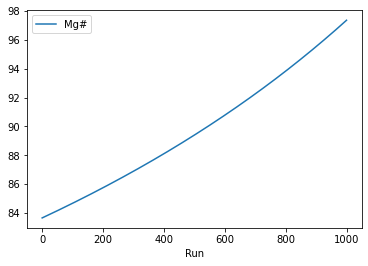

In [199]:
p_magmas.plot(x='Run', y='Mg#', kind='line')

<AxesSubplot:xlabel='Run'>

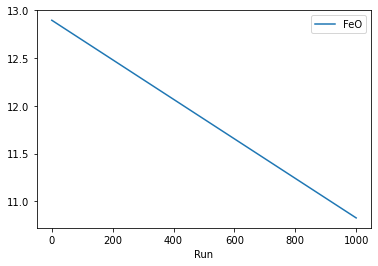

In [200]:
p_magmas.plot(x='Run', y='FeO', kind='line')